In [1]:
# importing necessary libraries

# for data pre-processing
import pandas as pd
import numpy as np

# to set working directory
import os

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for knn imputation
from sklearn.impute import KNNImputer

# for standard scaler
from sklearn.preprocessing import  StandardScaler

# for PCA
from sklearn.decomposition import PCA

# for KMeans
from sklearn.cluster import KMeans

# for calculating silhouette_coefficient
from sklearn import metrics

# for minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
os.chdir("D:\EXAMS\Data Scientist\edWisor\Project 2")

In [3]:
# Display all columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [4]:
credit=pd.read_csv('credit-card-data.csv')

In [5]:
credit.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# 1.Data Cleaning

#### Here we will check for any nonsensible values in all columns. If found any, we will make that observation value as NaN and finally impute them along with other missing values.

In [7]:
# 1. for BALANCE feature
credit['BALANCE'].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

In [8]:
# 2. for BALANCE_FREQUENCY feature
credit['BALANCE_FREQUENCY'].describe()

count    8950.000000
mean        0.877271
std         0.236904
min         0.000000
25%         0.888889
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

In [9]:
# 3. for PURCHASES feature
credit['PURCHASES'].describe()

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
25%         39.635000
50%        361.280000
75%       1110.130000
max      49039.570000
Name: PURCHASES, dtype: float64

In [10]:
# 4. for ONEOFF_PURCHASES feature
credit['ONEOFF_PURCHASES'].describe()

count     8950.000000
mean       592.437371
std       1659.887917
min          0.000000
25%          0.000000
50%         38.000000
75%        577.405000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

In [11]:
# 5. for INSTALLMENTS_PURCHASES feature
credit['INSTALLMENTS_PURCHASES'].describe()

count     8950.000000
mean       411.067645
std        904.338115
min          0.000000
25%          0.000000
50%         89.000000
75%        468.637500
max      22500.000000
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [12]:
# 6. for CASH_ADVANCE feature
credit['CASH_ADVANCE'].describe()

count     8950.000000
mean       978.871112
std       2097.163877
min          0.000000
25%          0.000000
50%          0.000000
75%       1113.821139
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

In [13]:
# 7. for PURCHASES_FREQUENCY feature
credit['PURCHASES_FREQUENCY'].describe()

count    8950.000000
mean        0.490351
std         0.401371
min         0.000000
25%         0.083333
50%         0.500000
75%         0.916667
max         1.000000
Name: PURCHASES_FREQUENCY, dtype: float64

In [14]:
# 8. for ONEOFF_PURCHASES_FREQUENCY feature
credit['ONEOFF_PURCHASES_FREQUENCY'].describe()

count    8950.000000
mean        0.202458
std         0.298336
min         0.000000
25%         0.000000
50%         0.083333
75%         0.300000
max         1.000000
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64

In [15]:
# 9. for PURCHASES_INSTALLMENTS_FREQUENCY feature
credit['PURCHASES_INSTALLMENTS_FREQUENCY'].describe()

count    8950.000000
mean        0.364437
std         0.397448
min         0.000000
25%         0.000000
50%         0.166667
75%         0.750000
max         1.000000
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64

In [16]:
# 10. for CASH_ADVANCE_FREQUENCY feature
credit['CASH_ADVANCE_FREQUENCY'].describe()

count    8950.000000
mean        0.135144
std         0.200121
min         0.000000
25%         0.000000
50%         0.000000
75%         0.222222
max         1.500000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

#### Here maximum value of CASH_ADVANCE_FREQUENCY is 1.5 which is impossible as maximum value should be 1. So we will be setting those values greater than 1 to NaN.

In [17]:
credit[credit['CASH_ADVANCE_FREQUENCY']>1]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
681   C10708  5656.069801           1.000000     362.36            362.36   
1626  C11680  2876.009336           1.000000     152.61            152.61   
2555  C12629  5906.184924           1.000000     141.80            141.80   
2608  C12684  7801.511533           1.000000     231.40            231.40   
3038  C13127  3846.742530           1.000000       0.00              0.00   
3253  C13347  5709.486507           0.833333       0.00              0.00   
8055  C18273  1917.895730           1.000000     285.07            285.07   
8365  C18588  3857.562230           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
681                      0.0   7240.433194             0.250000   
1626                     0.0   3719.650168             0.333333   
2555                     0.0   1651.286918             0.125000   
2608                     0.0   4109.465221             0.100000   
3038                     0.0   1932.460679             0.000000   
3253                     0.0   2794.326341             0.000000   
8055                     0.0   6084.858872             0.363636   
8365                     0.0   2127.213754             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
681                     0.250000                               0.0   
1626                    0.333333                               0.0   
2555                    0.125000                               0.0   
2608                    0.100000                               0.0   
3038                    0.000000                               0.0   
3253                    0.000000                               0.0   
8055                    0.363636                               0.0   
8365                    0.000000                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
681                 1.250000                12              2        8000.0   
1626                1.166667                24              2        4000.0   
2555                1.125000                12              2       10000.0   
2608                1.100000                20              3       13500.0   
3038                1.500000                18              0        5600.0   
3253                1.166667                10              0        6000.0   
8055                1.090909                28              6        3000.0   
8365                1.142857                26              0        5000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
681    683.421497       2036.877611               0.0       8  
1626   248.342971        584.926336               0.0       6  
2555   933.969974        919.289675               0.0       8  
2608  1593.617739       1522.496755               0.0      10  
3038   496.245836        538.346874               0.0       6  
3253   550.513331       1299.463370               0.0       6  
8055  5692.682993        556.449635               0.0      11  
8365   617.508991        538.396872               0.0       7

In [18]:
index=credit[credit['CASH_ADVANCE_FREQUENCY']>1].index
index

Int64Index([681, 1626, 2555, 2608, 3038, 3253, 8055, 8365], dtype='int64')

In [19]:
credit.loc[index,'CASH_ADVANCE_FREQUENCY']=np.nan

In [20]:
# 11. for CASH_ADVANCE_TRX feature
credit['CASH_ADVANCE_TRX'].describe()

count    8950.000000
mean        3.248827
std         6.824647
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       123.000000
Name: CASH_ADVANCE_TRX, dtype: float64

In [21]:
# 12. for PURCHASES_TRX feature
credit['PURCHASES_TRX'].describe()

count    8950.000000
mean       14.709832
std        24.857649
min         0.000000
25%         1.000000
50%         7.000000
75%        17.000000
max       358.000000
Name: PURCHASES_TRX, dtype: float64

In [22]:
# 13. for CREDIT_LIMIT feature
credit['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [23]:
# 14. for PAYMENTS feature
credit['PAYMENTS'].describe()

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
25%        383.276166
50%        856.901546
75%       1901.134317
max      50721.483360
Name: PAYMENTS, dtype: float64

In [24]:
# 15. for MINIMUM_PAYMENTS feature
credit['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [25]:
# 16. for PRC_FULL_PAYMENT feature
credit['PRC_FULL_PAYMENT'].describe()

count    8950.000000
mean        0.153715
std         0.292499
min         0.000000
25%         0.000000
50%         0.000000
75%         0.142857
max         1.000000
Name: PRC_FULL_PAYMENT, dtype: float64

In [26]:
# 17. for TENURE feature
credit['TENURE'].describe()

count    8950.000000
mean       11.517318
std         1.338331
min         6.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: TENURE, dtype: float64

In [27]:
credit['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

# 2.EDA

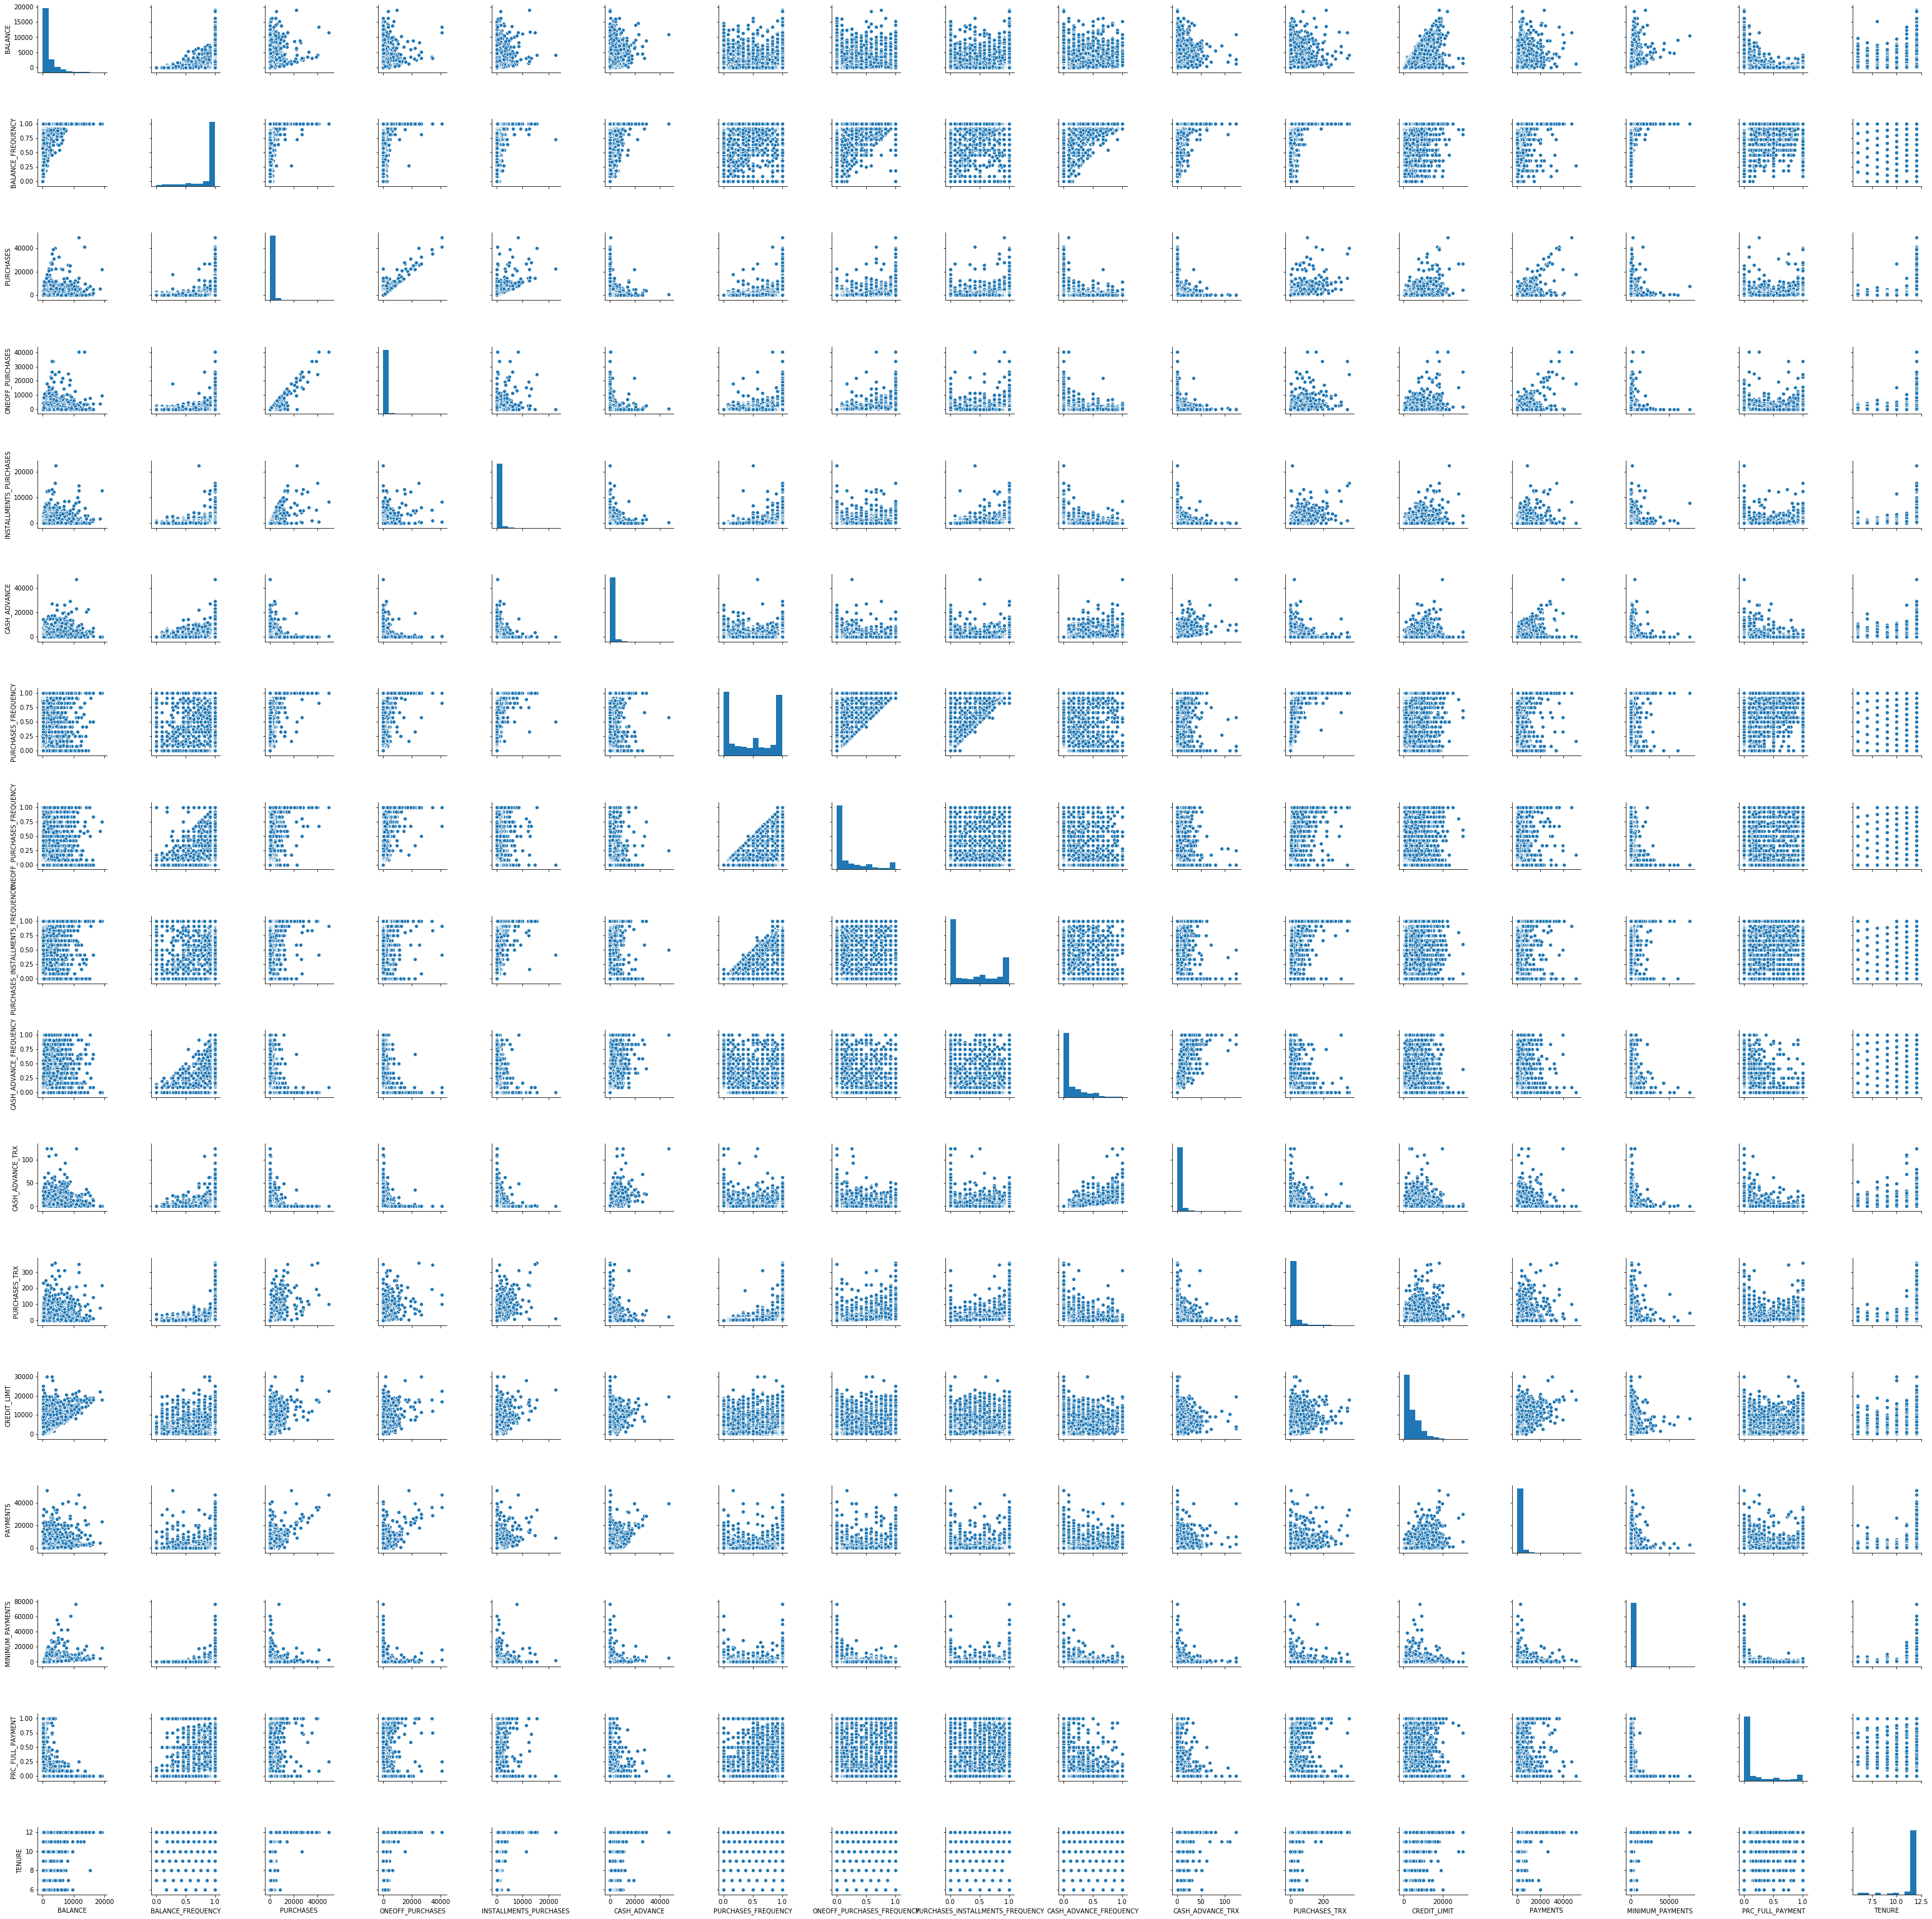

In [28]:
# pairplot
sns.pairplot(credit.iloc[:,1:])

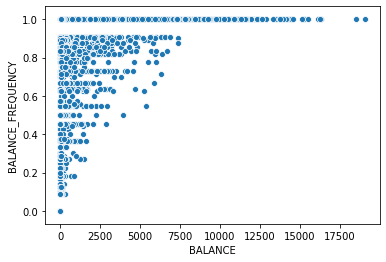

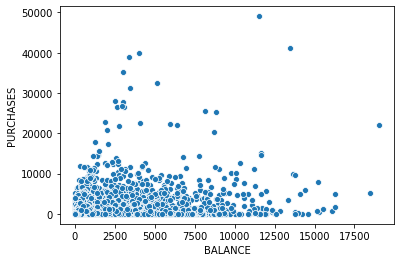

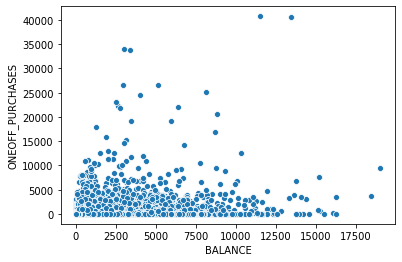

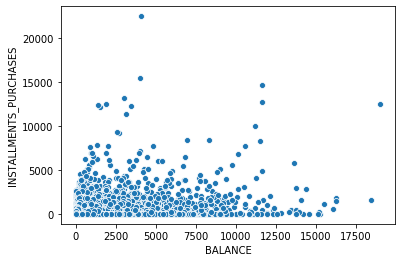

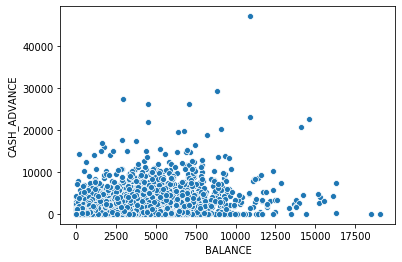

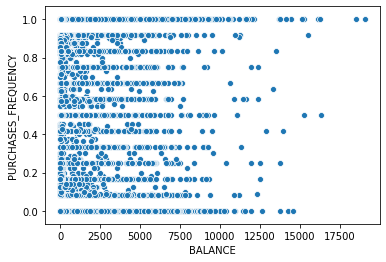

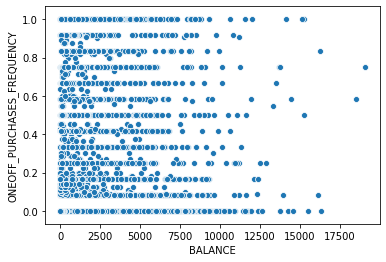

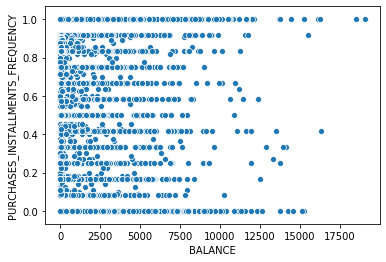

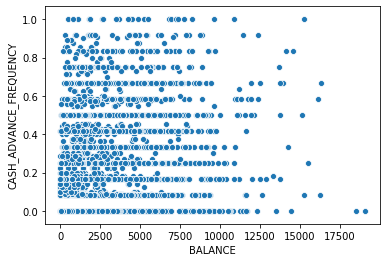

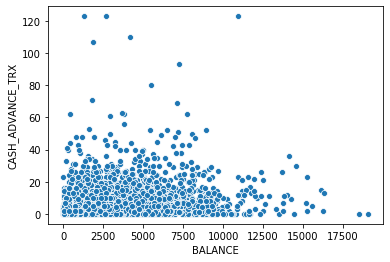

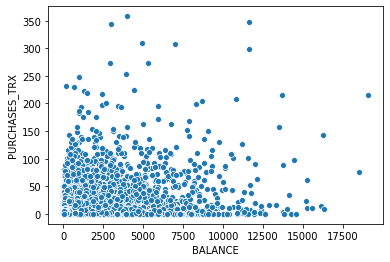

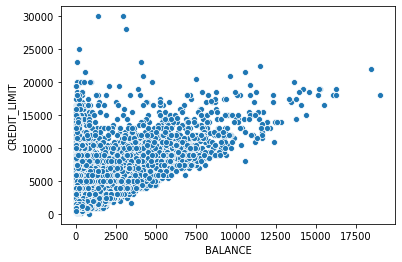

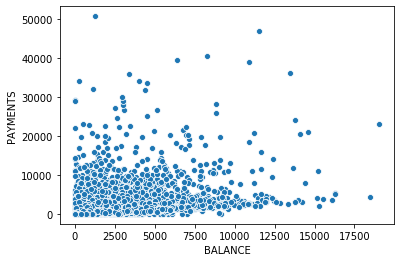

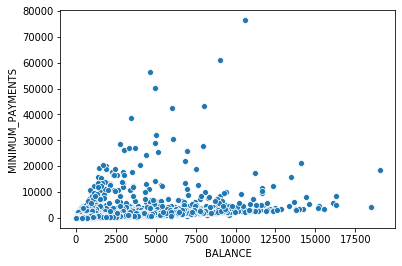

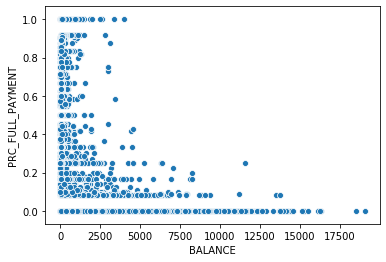

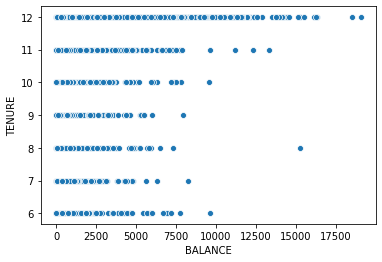

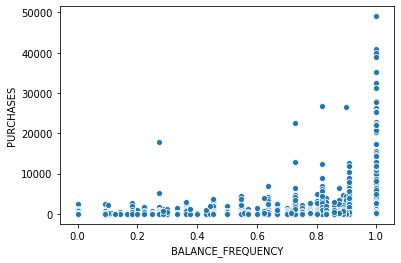

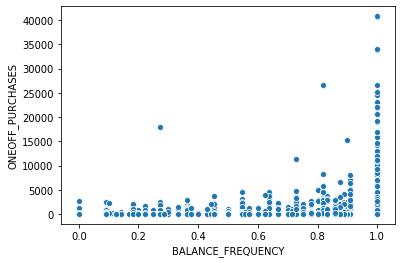

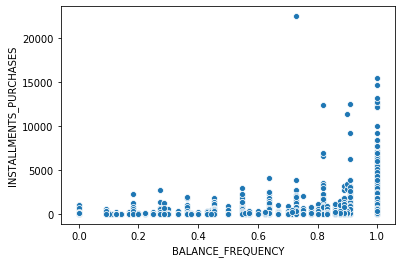

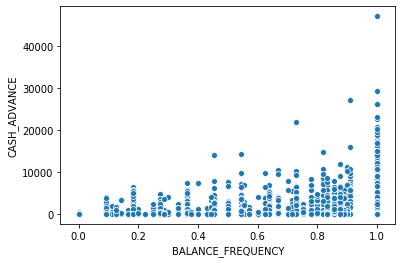

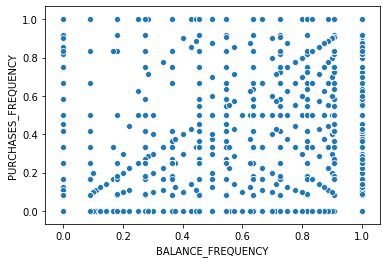

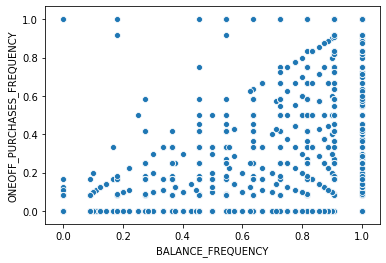

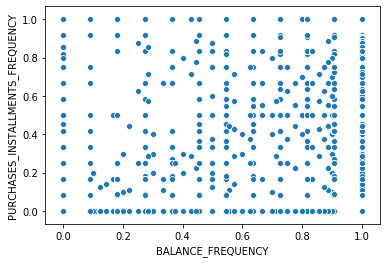

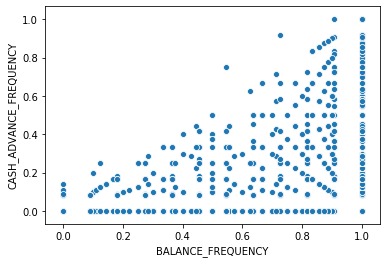

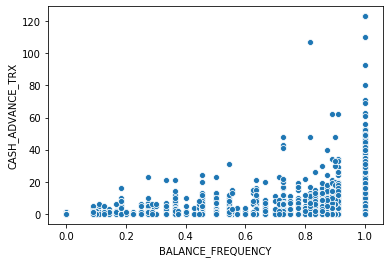

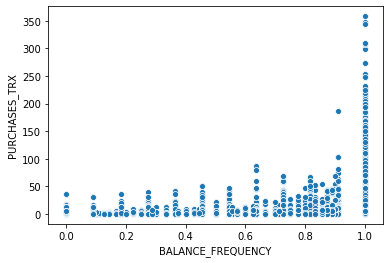

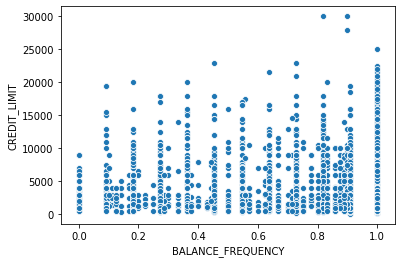

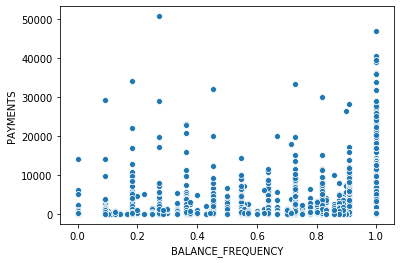

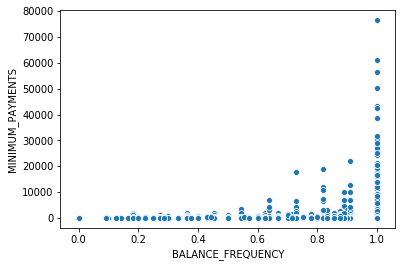

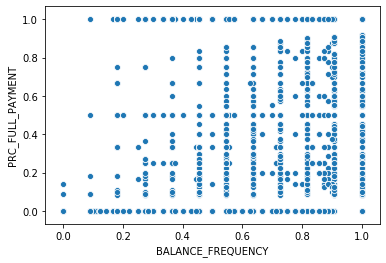

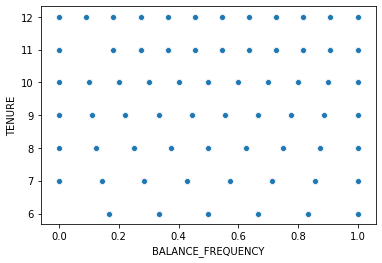

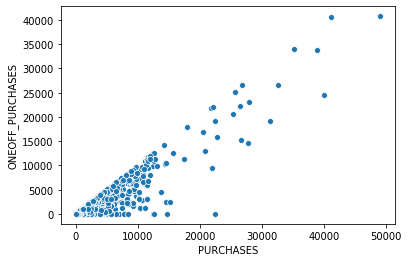

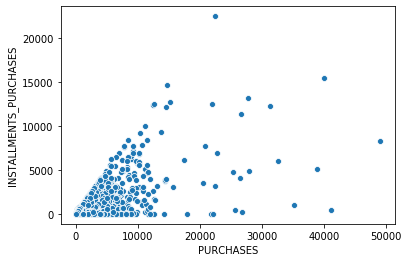

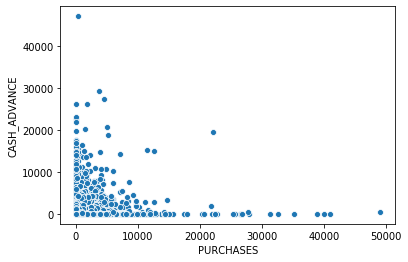

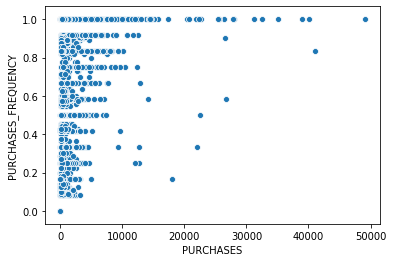

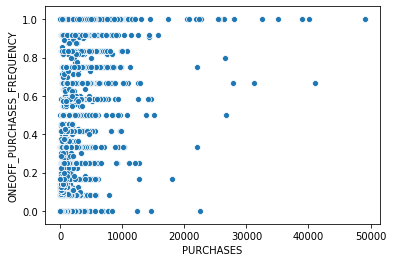

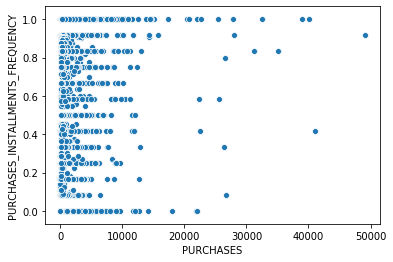

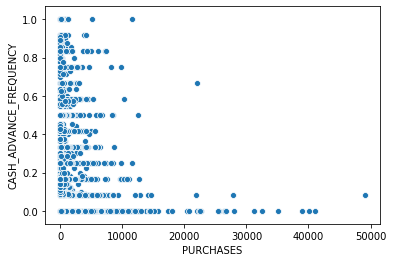

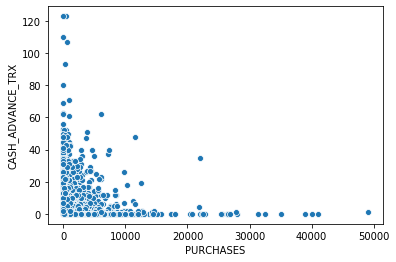

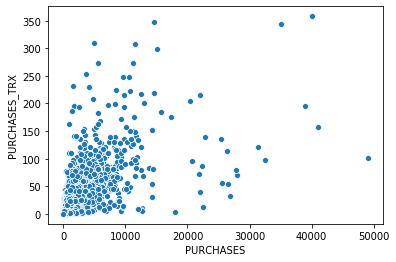

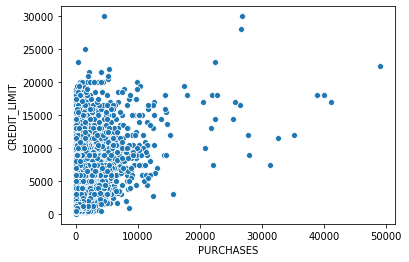

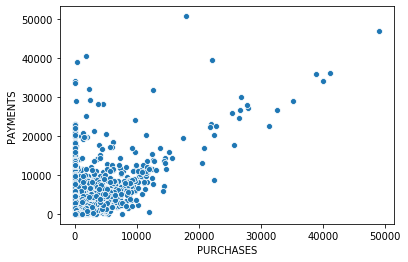

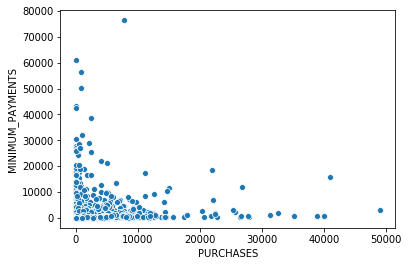

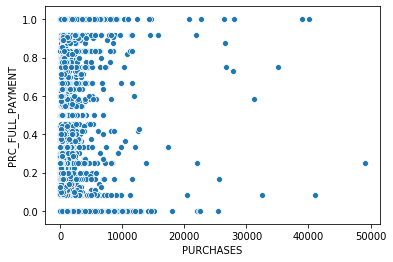

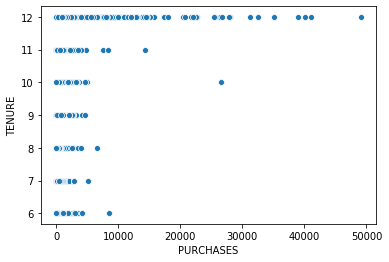

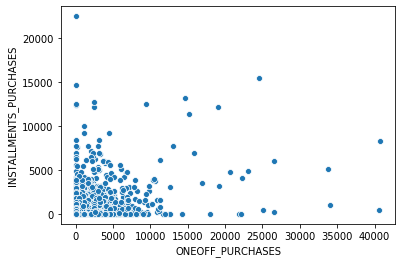

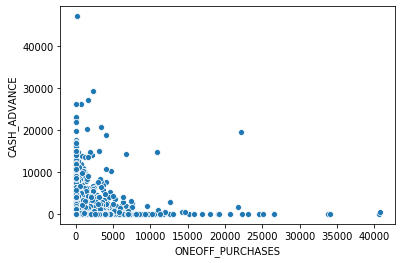

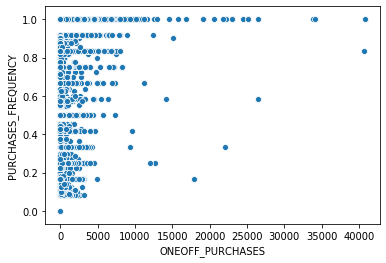

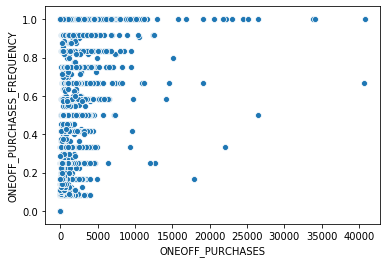

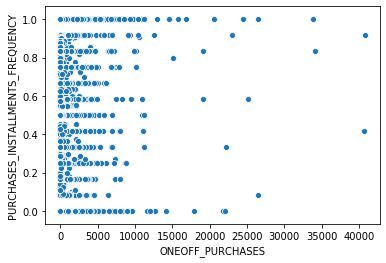

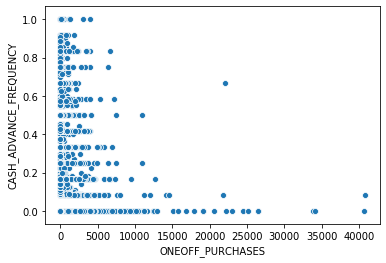

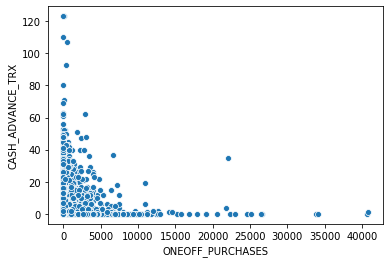

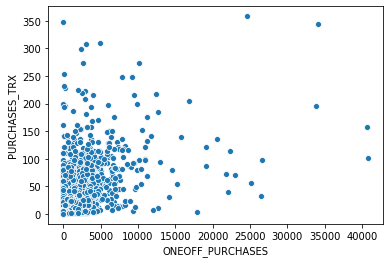

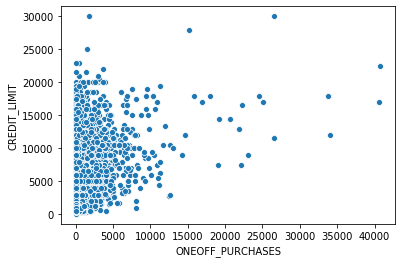

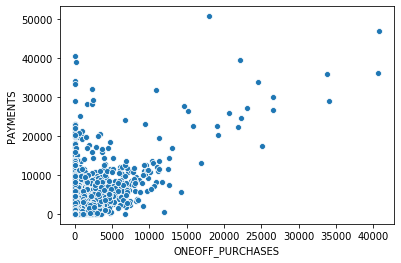

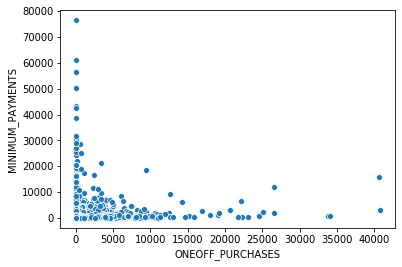

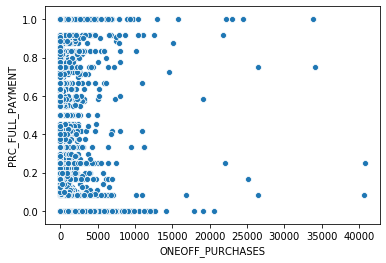

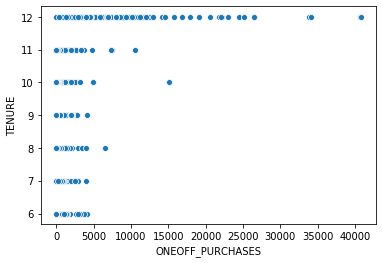

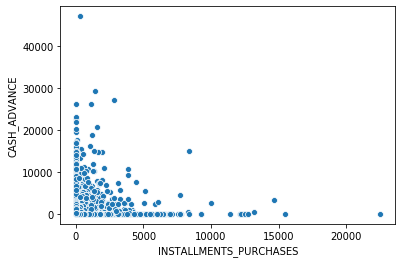

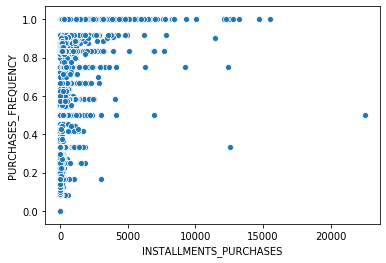

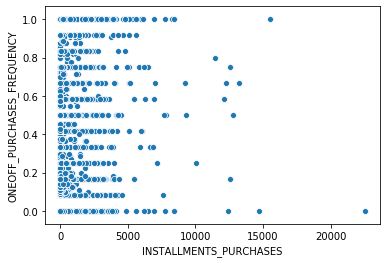

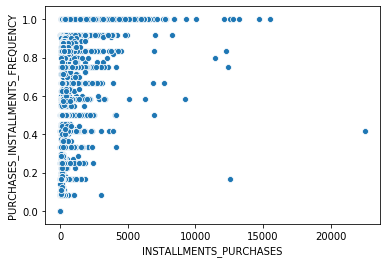

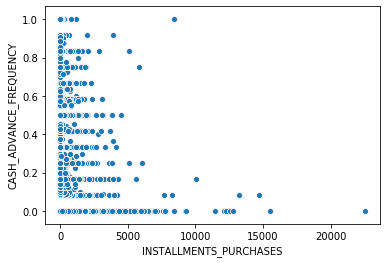

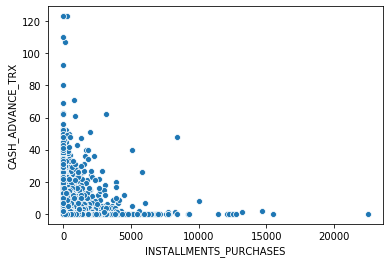

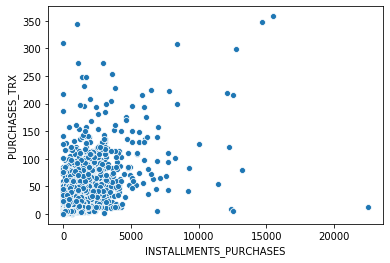

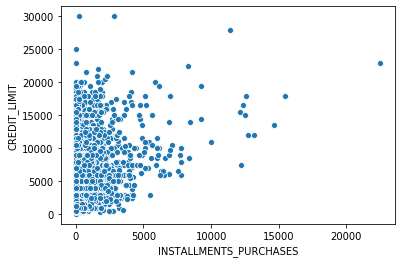

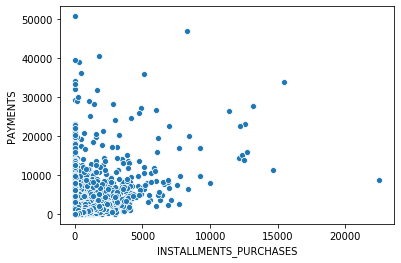

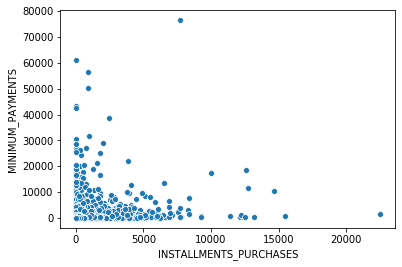

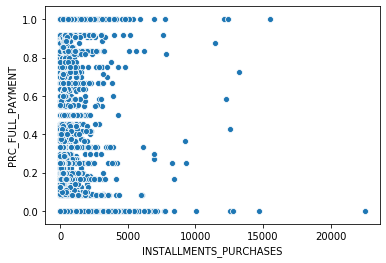

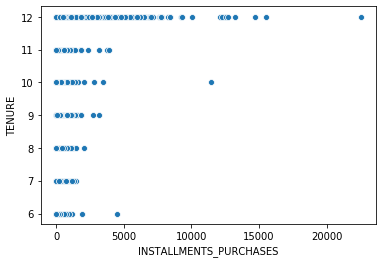

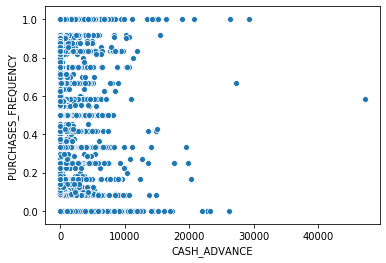

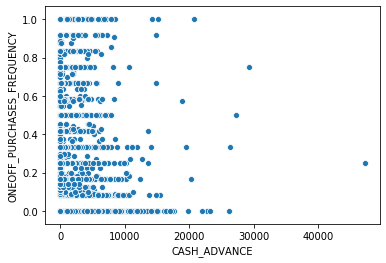

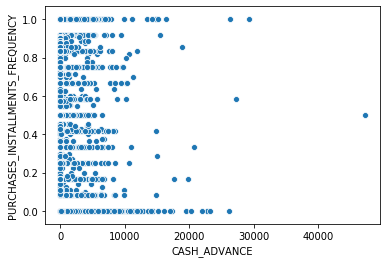

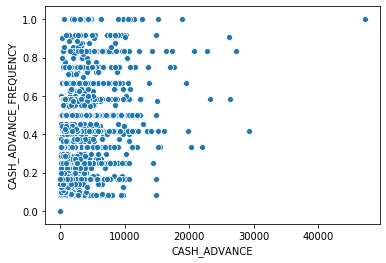

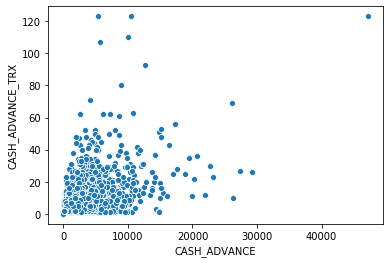

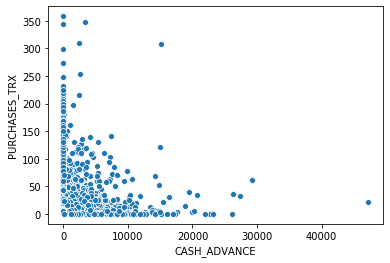

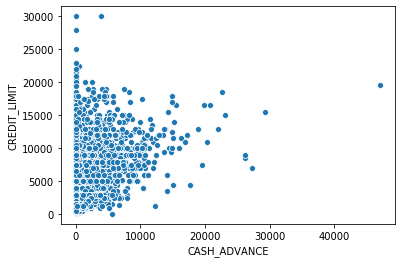

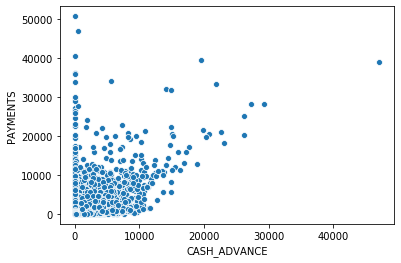

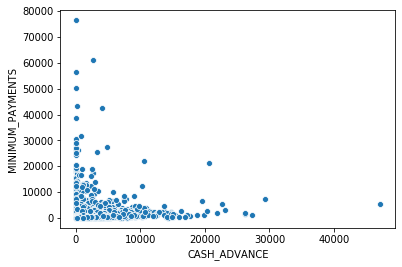

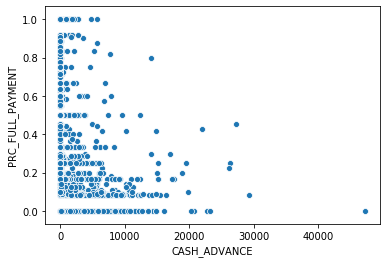

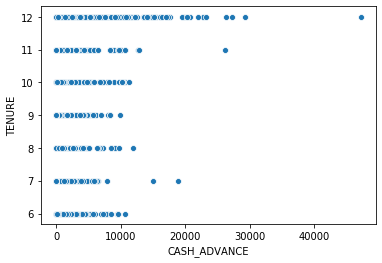

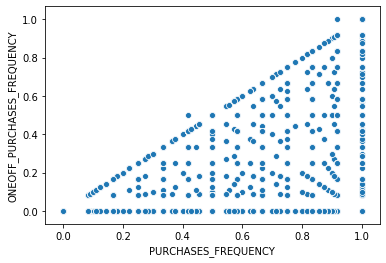

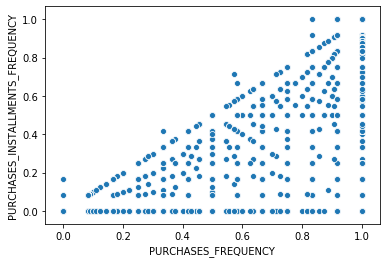

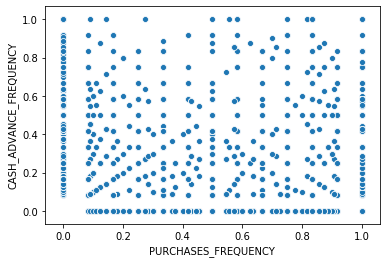

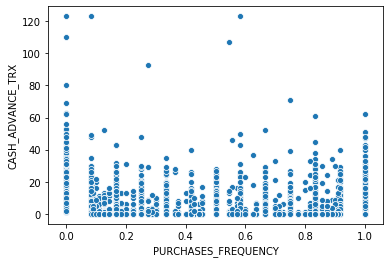

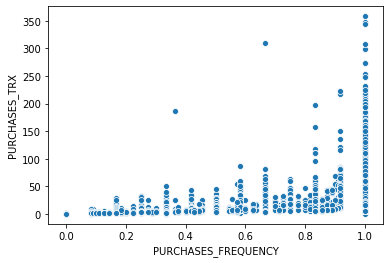

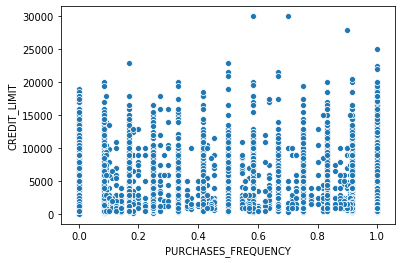

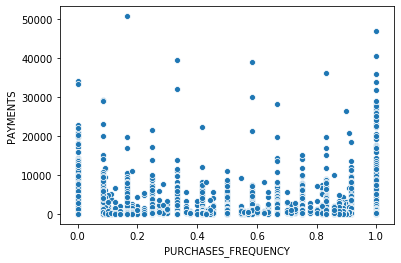

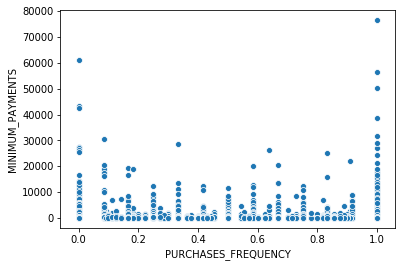

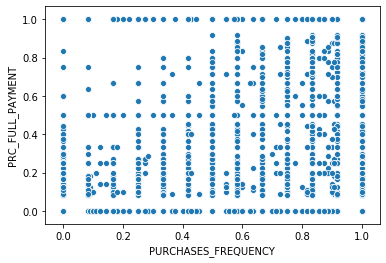

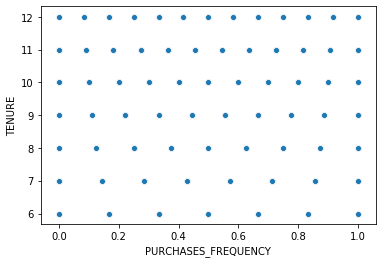

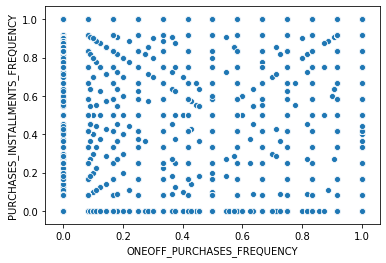

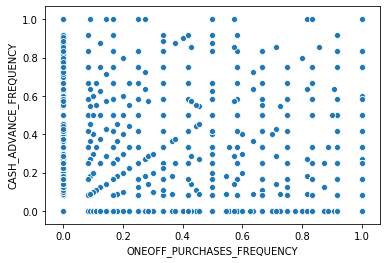

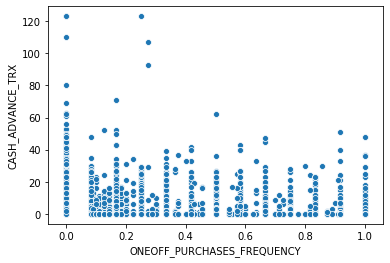

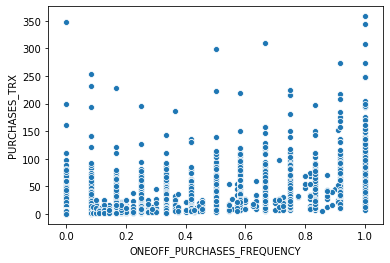

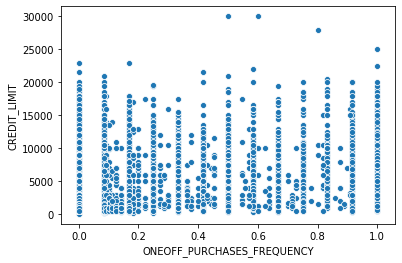

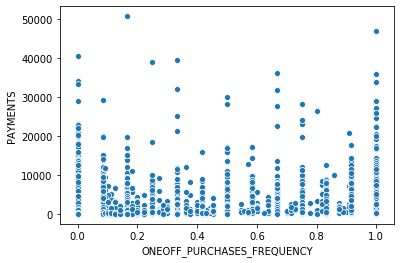

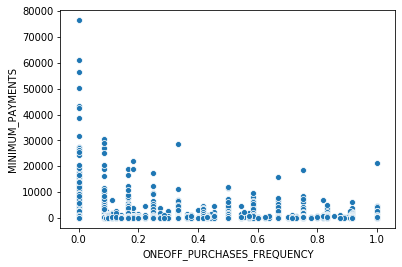

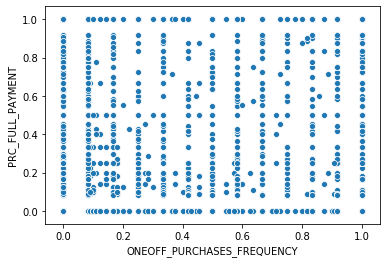

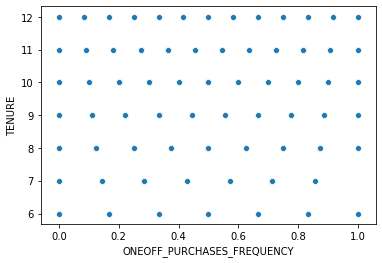

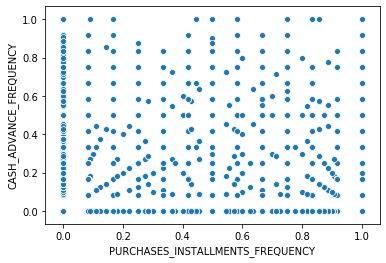

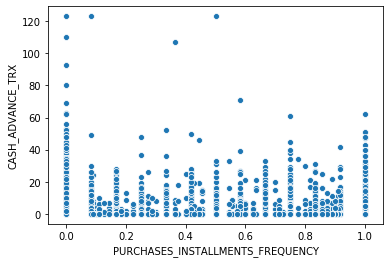

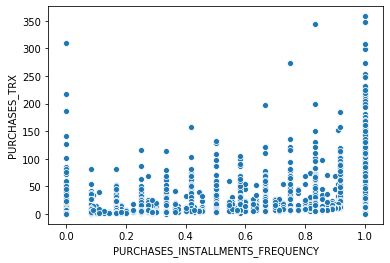

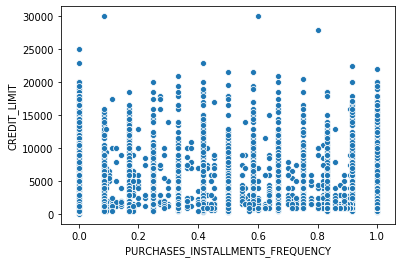

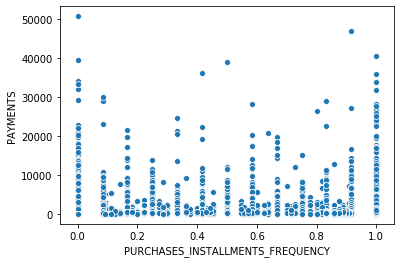

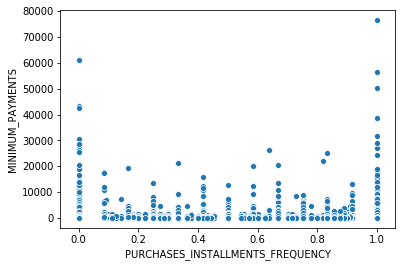

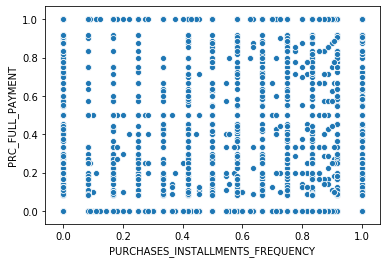

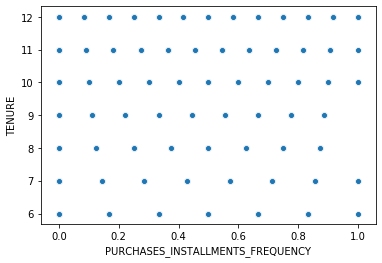

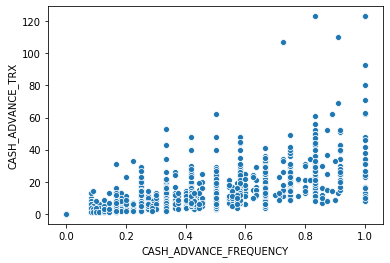

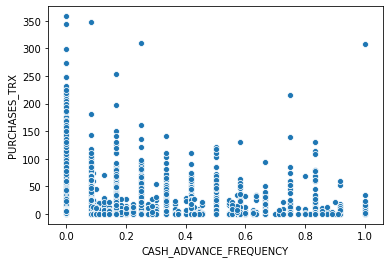

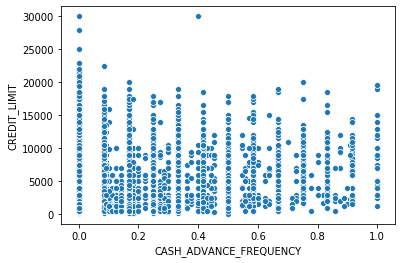

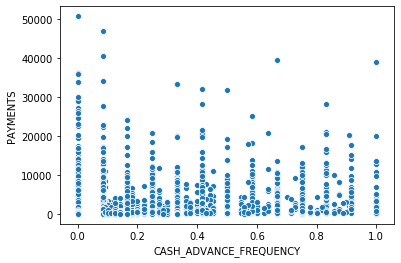

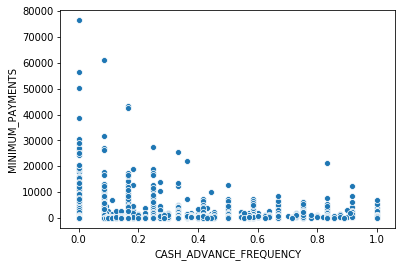

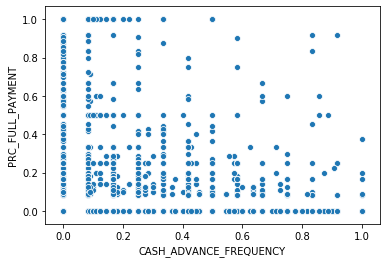

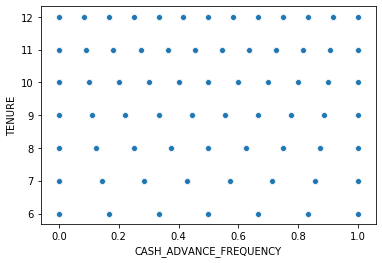

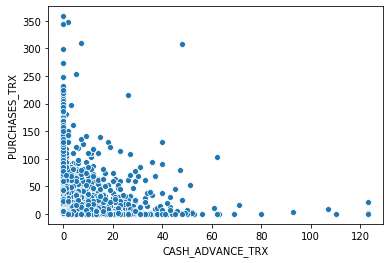

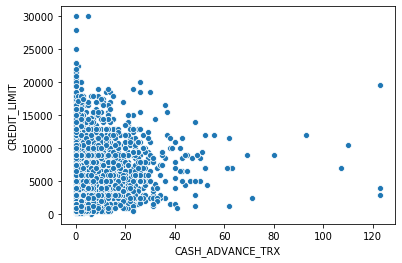

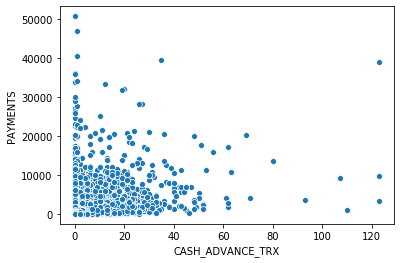

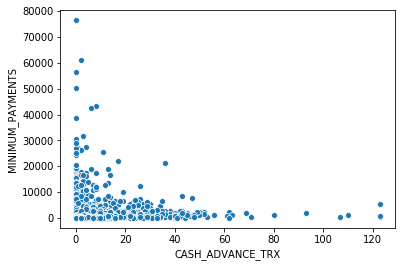

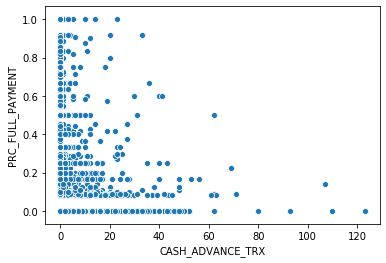

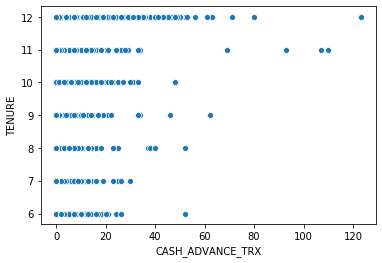

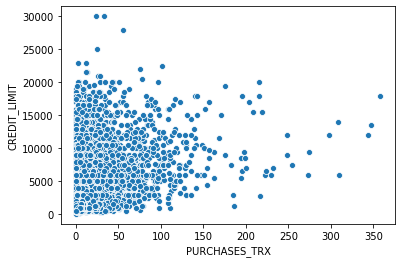

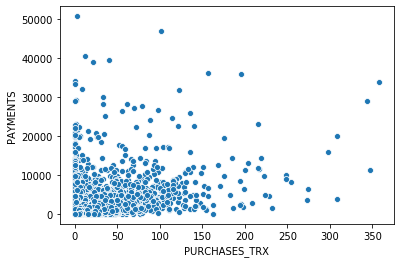

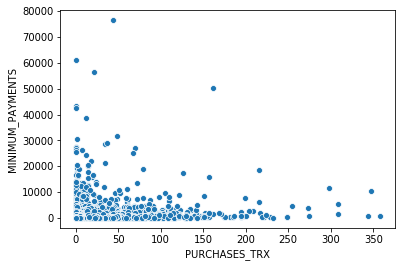

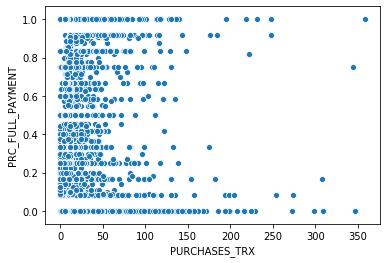

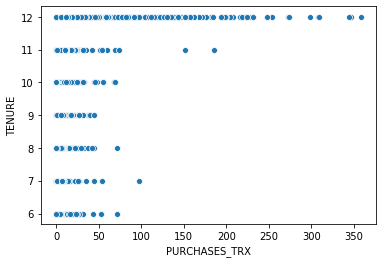

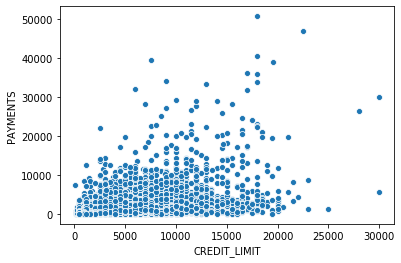

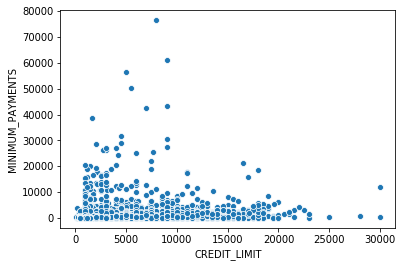

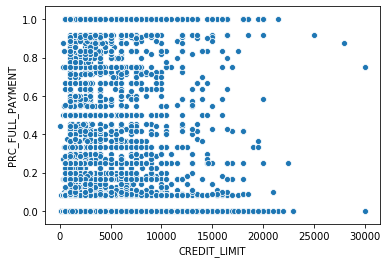

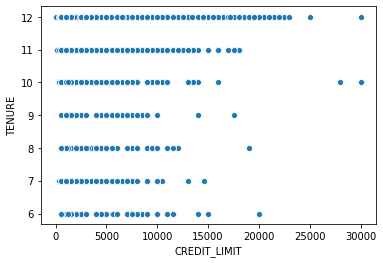

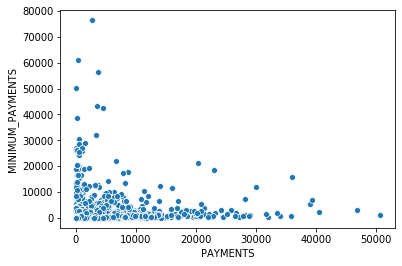

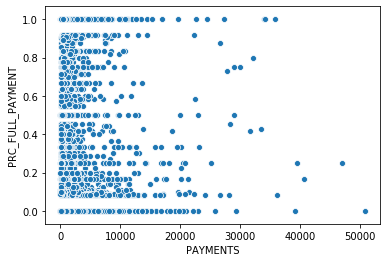

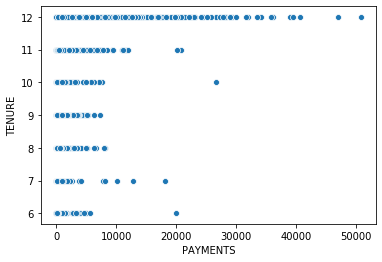

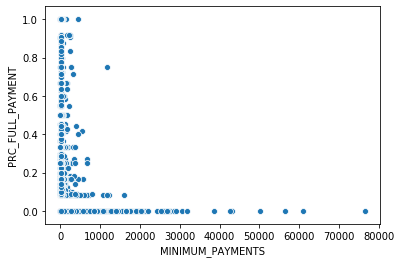

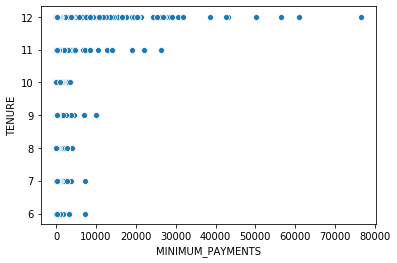

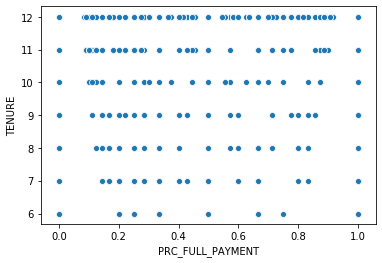

In [29]:
# scatterplot
for i in range(1,len(credit.columns)):
    for j in range(i+1,len(credit.columns)):
        sns.scatterplot(credit.iloc[:,i],credit.iloc[:,j])
        plt.show()

# 3.Missing Value Analysis

In [30]:
# checking for missing values
pd.DataFrame(pd.concat([credit.isnull().sum(),credit.isnull().mean()*100],axis=1)).rename(columns={0:"Count",1:"Percentage"}).sort_values('Percentage',ascending=False)

Count  Percentage
MINIMUM_PAYMENTS                    313    3.497207
CASH_ADVANCE_FREQUENCY                8    0.089385
CREDIT_LIMIT                          1    0.011173
CUST_ID                               0    0.000000
BALANCE                               0    0.000000
PRC_FULL_PAYMENT                      0    0.000000
PAYMENTS                              0    0.000000
PURCHASES_TRX                         0    0.000000
CASH_ADVANCE_TRX                      0    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY      0    0.000000
ONEOFF_PURCHASES_FREQUENCY            0    0.000000
PURCHASES_FREQUENCY                   0    0.000000
CASH_ADVANCE                          0    0.000000
INSTALLMENTS_PURCHASES                0    0.000000
ONEOFF_PURCHASES                      0    0.000000
PURCHASES                             0    0.000000
BALANCE_FREQUENCY                     0    0.000000
TENURE                                0    0.000000

In [31]:
a=pd.DataFrame()

## 3.1 MINIMUM_PAYMENTS

In [32]:
credit.loc[100,'MINIMUM_PAYMENTS']

60.913577000000004

In [33]:
# We will set a known value of MINIMUM_PAYMENTS as NaN and do check for mean,median and knn imputation and compare these values with actual values.

# Setting the 100th obs as NaN
print('Actual value: ',credit.loc[100,'MINIMUM_PAYMENTS'])
credit.loc[100,'MINIMUM_PAYMENTS']=np.nan
print('Mean Imputation: ',credit['MINIMUM_PAYMENTS'].mean())
print('Median Imputation: ',credit['MINIMUM_PAYMENTS'].median())
print('KNN Imputation at k=7: ',pd.DataFrame(KNNImputer(n_neighbors=7).fit_transform(credit.iloc[:,1:]),columns=credit.columns[1:]).loc[100,'MINIMUM_PAYMENTS'])
credit.loc[100,'MINIMUM_PAYMENTS']=60.913577000000004

Actual value:  60.913577000000004
Mean Imputation:  864.2995590912445
Median Imputation:  312.4522915
KNN Imputation at k=7:  65.45922057142857


#### Based on these values KNN performs the best.

In [34]:
#  MINIMUM_PAYMENTS

# Actual value 
a['actual']=credit['MINIMUM_PAYMENTS'].copy()

# Imputing with mean value
a['mean']=a['actual'].fillna(a['actual'].mean())

# Imputing with median value
a['median']=a['actual'].fillna(a['actual'].median())

# KNN Imputation
a['knn']=pd.DataFrame(KNNImputer(n_neighbors=7).fit_transform(credit.iloc[:,1:]),columns=credit.columns[1:]).loc[:,'MINIMUM_PAYMENTS']

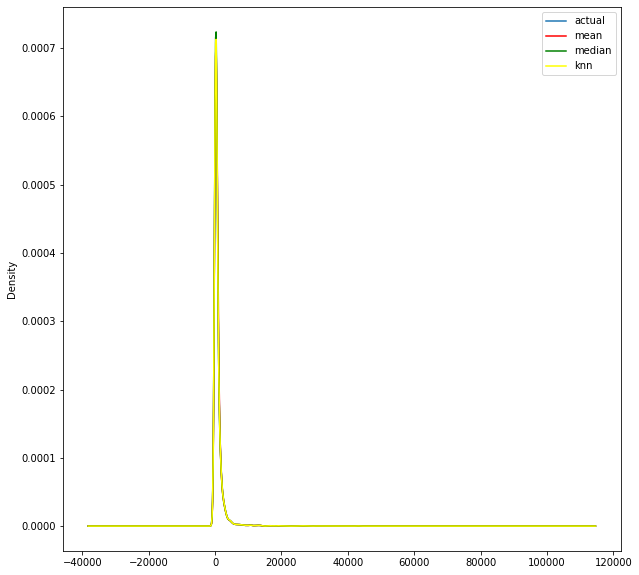

In [35]:
# Plotting Probability Density Function of actual value , mean imputation, median imputation, knn imputation of MINIMUM_PAYMENTS
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
a['actual'].plot(kind='kde', ax=ax)
a['mean'].plot(kind='kde', ax=ax, color='red')
a['median'].plot(kind='kde', ax=ax, color='green')
a['knn'].plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Since MINIMUM_PAYMENTS has very large outliers, we are not able to distinguish PDF of different imputations.
#### So we are inputing MINIMUM_PAYMENTS to log function to reduce the effect of outliers.

In [36]:
a['actual']=np.log(a['actual'])
a['mean']=np.log(a['mean'])
a['median']=np.log(a['median'])
a['knn']=np.log(a['knn'])

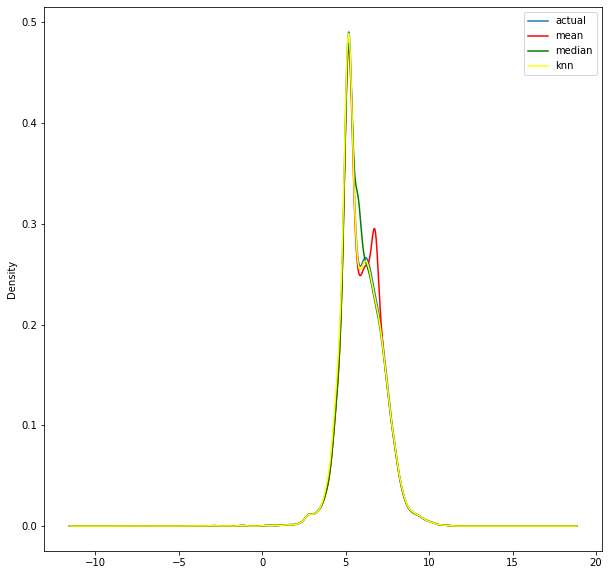

In [37]:
# Plotting Probability Density Function of actual value , mean imputation, median imputation, knn imputation of MINIMUM_PAYMENTS
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
a['actual'].plot(kind='kde', ax=ax)
a['mean'].plot(kind='kde', ax=ax, color='red')
a['median'].plot(kind='kde', ax=ax, color='green')
a['knn'].plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### From this given PDF, we can see knn Imputation has very little variation compared to actual value. So we are using knn imputation to impute the missing values of MINIMUM_PAYMENTS.

## 3.2 CASH_ADVANCE_FREQUENCY

In [38]:
credit.loc[453,'CASH_ADVANCE_FREQUENCY']

1.0

In [39]:
# We will set a known value of CASH_ADVANCE_FREQUENCY as NaN and do check for mean,median and knn imputation and compare these values with actual values.

# Setting the 453th obs as NaN
print('Actual value: ',credit.loc[453,'CASH_ADVANCE_FREQUENCY'])
credit.loc[453,'CASH_ADVANCE_FREQUENCY']=np.nan
print('Mean Imputation: ',credit['CASH_ADVANCE_FREQUENCY'].mean())
print('Median Imputation: ',credit['CASH_ADVANCE_FREQUENCY'].median())
print('KNN Imputation at k=4: ',pd.DataFrame(KNNImputer(n_neighbors=4).fit_transform(credit.iloc[:,1:]),columns=credit.columns[1:]).loc[453,'CASH_ADVANCE_FREQUENCY'])
credit.loc[453,'CASH_ADVANCE_FREQUENCY']=1.0

Actual value:  1.0
Mean Imputation:  0.13410116239794367
Median Imputation:  0.0
KNN Imputation at k=4:  0.47916675


#### Based on these values KNN performs the best

## 3.3 CREDIT_LIMIT

In [40]:
credit.loc[100,'CREDIT_LIMIT']

1500.0

In [41]:
# We will set a known value of CREDIT_LIMIT as NaN and do check for mean,median and knn imputation and compare these values with actual values.

# Setting the 100th obs as NaN
print('Actual value: ',credit.loc[100,'CREDIT_LIMIT'])
credit.loc[100,'CREDIT_LIMIT']=np.nan
print('Mean Imputation: ',credit['CREDIT_LIMIT'].mean())
print('Median Imputation: ',credit['CREDIT_LIMIT'].median())
print('KNN Imputation at k=2: ',pd.DataFrame(KNNImputer(n_neighbors=2).fit_transform(credit.iloc[:,1:]),columns=credit.columns[1:]).loc[100,'CREDIT_LIMIT'])
credit.loc[100,'CREDIT_LIMIT']=1500.0

Actual value:  1500.0
Mean Imputation:  4494.784100504358
Median Imputation:  3000.0
KNN Imputation at k=2:  2400.0


#### Based on these values KNN performs the best

In [42]:
# Imputation of missing values

data=credit.copy()
# for MINIMUM_PAYMENTS
credit['MINIMUM_PAYMENTS']=pd.DataFrame(KNNImputer(n_neighbors=7).fit_transform(data.iloc[:,1:]),columns=data.columns[1:]).loc[:,'MINIMUM_PAYMENTS']

# for CASH_ADVANCE_FREQUENCY
credit['CASH_ADVANCE_FREQUENCY']=pd.DataFrame(KNNImputer(n_neighbors=4).fit_transform(data.iloc[:,1:]),columns=data.columns[1:]).loc[:,'CASH_ADVANCE_FREQUENCY']

# for CREDIT_LIMIT
credit['CREDIT_LIMIT']=pd.DataFrame(KNNImputer(n_neighbors=2).fit_transform(data.iloc[:,1:]),columns=data.columns[1:]).loc[:,'CREDIT_LIMIT']

In [43]:
credit.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# 4.Feature Extraction (Deriving New KPIs)

## 4.1 Monthly Average Purchases

In [44]:
#  Monthly Average Purchases
credit['MONTHLY_AVG_PURCHASES']=credit['PURCHASES']/credit['TENURE']
credit['MONTHLY_AVG_PURCHASES'].describe()

count    8950.000000
mean       86.175173
std       180.508787
min         0.000000
25%         3.399375
50%        31.936667
75%        97.228333
max      4086.630833
Name: MONTHLY_AVG_PURCHASES, dtype: float64

## 4.2 Monthly Average Cash Advance Amount

In [45]:
#  Monthly Average Cash Advance Amount
credit['MONTHLY_AVG_CASH_ADVANCE']=credit['CASH_ADVANCE']/credit['TENURE']
credit['MONTHLY_AVG_CASH_ADVANCE'].describe()

count    8950.000000
mean       88.977984
std       193.136115
min         0.000000
25%         0.000000
50%         0.000000
75%        99.085196
max      3928.100980
Name: MONTHLY_AVG_CASH_ADVANCE, dtype: float64

## 4.3 Purchases by Type(one-off, instalment)

In [46]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [47]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [48]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [49]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

#### From the above results we can say that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour

In [50]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'NONE'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'BOTH ONEOFF & INSTALMENT'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'ONEOFF'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'INSTALMENT'
credit['PURCHASE_TYPE']=credit.apply(purchase,axis=1)

In [51]:
credit['PURCHASE_TYPE'].value_counts()

BOTH ONEOFF & INSTALMENT    2774
INSTALMENT                  2260
NONE                        2042
ONEOFF                      1874
Name: PURCHASE_TYPE, dtype: int64

## 4.4 Limit Usage (Balance to credit limit ratio)

In [52]:
# Limit Usage
credit['LIMIT_USAGE']=credit['BALANCE']/credit['CREDIT_LIMIT']
credit['LIMIT_USAGE'].describe()

count    8950.000000
mean        0.388884
std         0.389722
min         0.000000
25%         0.041494
50%         0.302720
75%         0.717571
max        15.909951
Name: LIMIT_USAGE, dtype: float64

## 4.5 Payments to Minimum Payments Ratio

In [53]:
## Payments to Minimum Payments Ratio

credit['PAYMENTS_MIN_PAYMENTS_RATIO']=credit['PAYMENTS']/credit['MINIMUM_PAYMENTS']
credit['PAYMENTS_MIN_PAYMENTS_RATIO'].describe()

count    8950.000000
mean        9.061145
std       118.176094
min         0.000000
25%         0.918910
50%         2.048261
75%         6.079428
max      6840.528861
Name: PAYMENTS_MIN_PAYMENTS_RATIO, dtype: float64

In [54]:
credit.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
3     0.000000        442.874063          0.000000      12   
4   678.334763        244.791237          0.000000      12   

   MONTHLY_AVG_PURCHASES  MONTHLY_AVG_CASH_ADVANCE PURCHASE_TYPE  LIMIT_USAGE  \
0               7.950000                  0.000000    INSTALMENT     0.040901   
1               0.000000                536.912124          NONE     0.457495   
2              64.430833                  0.000000        ONEOFF     0.332687   
3             124.916667                 17.149001        ONEOFF     0.222223   
4               1.333333                  0.000000        ONEOFF     0.681429   

   PAYMENTS_MIN_PAYMENTS_RATIO  
0                     1.446508  
1                     3.826241  
2                     0.991682  
3                     0.000000  
4                     2.771075

## 4.6 Insights from KPIs

Text(0.5, 1.0, 'Monthly Average Purchases w.r.t Purchases by Type')

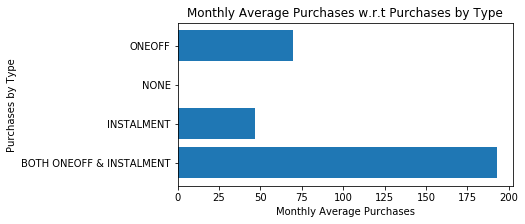

In [55]:
#  Monthly Average Purchases w.r.t Purchases by Type
x=credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_AVG_PURCHASES']))
fig,ax=plt.subplots(figsize=(6,3))
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.xlabel('Monthly Average Purchases')
plt.ylabel('Purchases by Type')
plt.title('Monthly Average Purchases w.r.t Purchases by Type')

#### Based on this bar graph we can say that customers who purchase by both one-off and instalment spend money more for purchase monthly.

Text(0.5, 1.0, 'Monthly Average Cash Advance Amount w.r.t Purchases by Type')

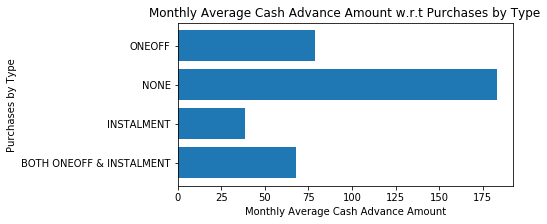

In [56]:
#  Monthly Average Cash Advance Amount w.r.t Purchases by Type
x=credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_AVG_CASH_ADVANCE']))
fig,ax=plt.subplots(figsize=(6,3))
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.xlabel('Monthly Average Cash Advance Amount')
plt.ylabel('Purchases by Type')
plt.title('Monthly Average Cash Advance Amount w.r.t Purchases by Type')

#### Based on this bar graph we can say that customers who neither purchase by both one-off nor by instalment withdraw money as cash more in a month whereas customers who purchase by only instalment withdraw the least.

Text(0.5, 1.0, 'Limit Usage w.r.t Purchases by Type')

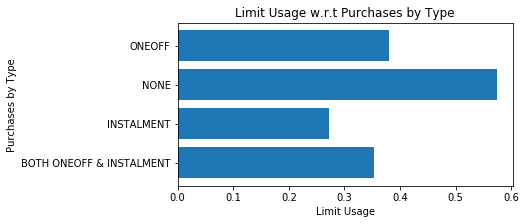

In [58]:
#  Limit Usage w.r.t Purchases by Type
x=credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['LIMIT_USAGE']))
fig,ax=plt.subplots(figsize=(6,3))
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.xlabel('Limit Usage')
plt.ylabel('Purchases by Type')
plt.title('Limit Usage w.r.t Purchases by Type')

#### Based on this bar graph we can say that customers who neither purchase by both one-off nor by instalment utilize the credit card more in a month whereas customers who purchase by only instalment utilize the least.

Text(0.5, 1.0, 'Payments to Minimum Payments Ratio w.r.t Purchases by Type')

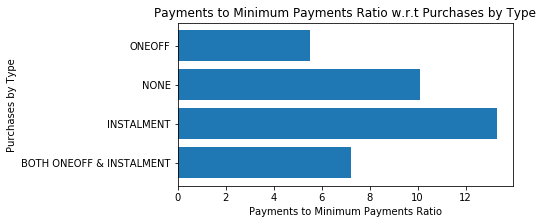

In [59]:
#  Payments to Minimum Payments Ratio w.r.t Purchases by Type
x=credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['PAYMENTS_MIN_PAYMENTS_RATIO']))
fig,ax=plt.subplots(figsize=(6,3))
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.xlabel('Payments to Minimum Payments Ratio')
plt.ylabel('Purchases by Type')
plt.title('Payments to Minimum Payments Ratio w.r.t Purchases by Type')

#### Based on this bar graph we can say that customers who purchase by only instalment have the highest Payments to Minimum Payments ratio while customers who purchase by only one-off have the least ratio.

In [60]:
# One-hot encoding for nominal category variable
cr_encode=pd.get_dummies(credit['PURCHASE_TYPE'])
cr_encode.head()

BOTH ONEOFF & INSTALMENT  INSTALMENT  NONE  ONEOFF
0                         0           1     0       0
1                         0           0     1       0
2                         0           0     0       1
3                         0           0     0       1
4                         0           0     0       1

In [61]:
credit=credit.drop('PURCHASE_TYPE',axis=1)
credit_original=pd.concat([credit,cr_encode],axis=1)
credit_original.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
3     0.000000        442.874063          0.000000      12   
4   678.334763        244.791237          0.000000      12   

   MONTHLY_AVG_PURCHASES  MONTHLY_AVG_CASH_ADVANCE  LIMIT_USAGE  \
0               7.950000                  0.000000     0.040901   
1               0.000000                536.912124     0.457495   
2              64.430833                  0.000000     0.332687   
3             124.916667                 17.149001     0.222223   
4               1.333333                  0.000000     0.681429   

   PAYMENTS_MIN_PAYMENTS_RATIO  BOTH ONEOFF & INSTALMENT  INSTALMENT  NONE  \
0                     1.446508                         0           1     0   
1                     3.826241                         0           0     1   
2                     0.991682                         0           0     0   
3                     0.000000                         0           0     0   
4                     2.771075                         0           0     0   

   ONEOFF  
0       0  
1       0  
2       1  
3       1  
4       1

In [62]:
# dropping off those variables from which new KPIs are derived
credit=credit.drop(['CUST_ID','BALANCE','PURCHASES','PAYMENTS','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','MINIMUM_PAYMENTS','CREDIT_LIMIT','TENURE'],axis=1)

In [63]:
# saving the original data of credit-card-data.csv dataset to credit_original while dropping some unnecessary columns
credit_original=credit_original.drop(['CUST_ID','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE'],axis=1)

In [64]:
credit_original.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'MONTHLY_AVG_PURCHASES', 'MONTHLY_AVG_CASH_ADVANCE',
       'LIMIT_USAGE', 'PAYMENTS_MIN_PAYMENTS_RATIO',
       'BOTH ONEOFF & INSTALMENT', 'INSTALMENT', 'NONE', 'ONEOFF'],
      dtype='object')

In [65]:
credit.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'PRC_FULL_PAYMENT', 'MONTHLY_AVG_PURCHASES', 'MONTHLY_AVG_CASH_ADVANCE',
       'LIMIT_USAGE', 'PAYMENTS_MIN_PAYMENTS_RATIO'],
      dtype='object')

# 5. Outlier Analysis

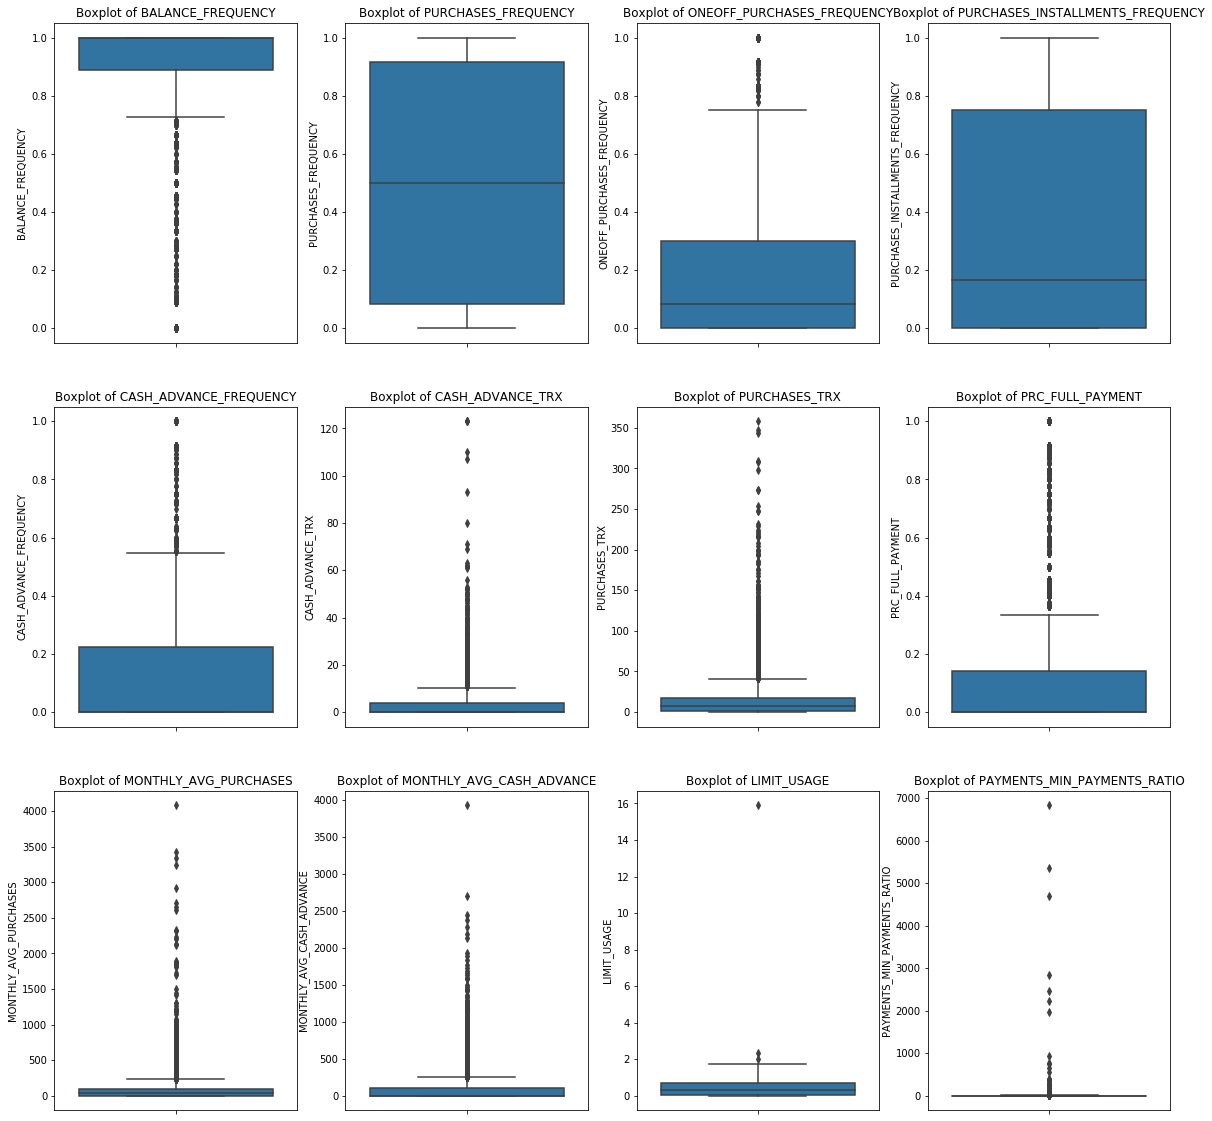

In [66]:
# checking for outliers
plt.figure(figsize=(20,20))
i=1
for feature in credit.columns:
    plt.subplot(3,4,i)
    sns.boxplot(y=feature,data=credit)
    i=i+1
    plt.title('Boxplot of '+str(feature))

#### Since outliers are present in this dataset and may give valuable information to our model, we are not going to remove or set values to NaN.
#### Instead we will be doing log transformation to reduce outlier effect.

In [67]:
credit_log=np.log(credit+1)
credit_log.head()

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0           0.597837             0.154151                    0.000000   
1           0.646627             0.000000                    0.000000   
2           0.693147             0.693147                    0.693147   
3           0.492477             0.080042                    0.080042   
4           0.693147             0.080042                    0.080042   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.080042                0.000000          0.000000   
1                          0.000000                0.223144          1.609438   
2                          0.000000                0.000000          0.000000   
3                          0.000000                0.080042          0.693147   
4                          0.000000                0.000000          0.000000   

   PURCHASES_TRX  PRC_FULL_PAYMENT  MONTHLY_AVG_PURCHASES  \
0       1.098612          0.000000               2.191654   
1       0.000000          0.200671               0.000000   
2       2.564949          0.000000               4.180994   
3       0.693147          0.000000               4.835620   
4       0.693147          0.000000               0.847298   

   MONTHLY_AVG_CASH_ADVANCE  LIMIT_USAGE  PAYMENTS_MIN_PAYMENTS_RATIO  
0                  0.000000     0.040086                     0.894662  
1                  6.287695     0.376719                     1.574068  
2                  0.000000     0.287197                     0.688979  
3                  2.898616     0.200671                     0.000000  
4                  0.000000     0.519644                     1.327360

# 6.Feature Selection

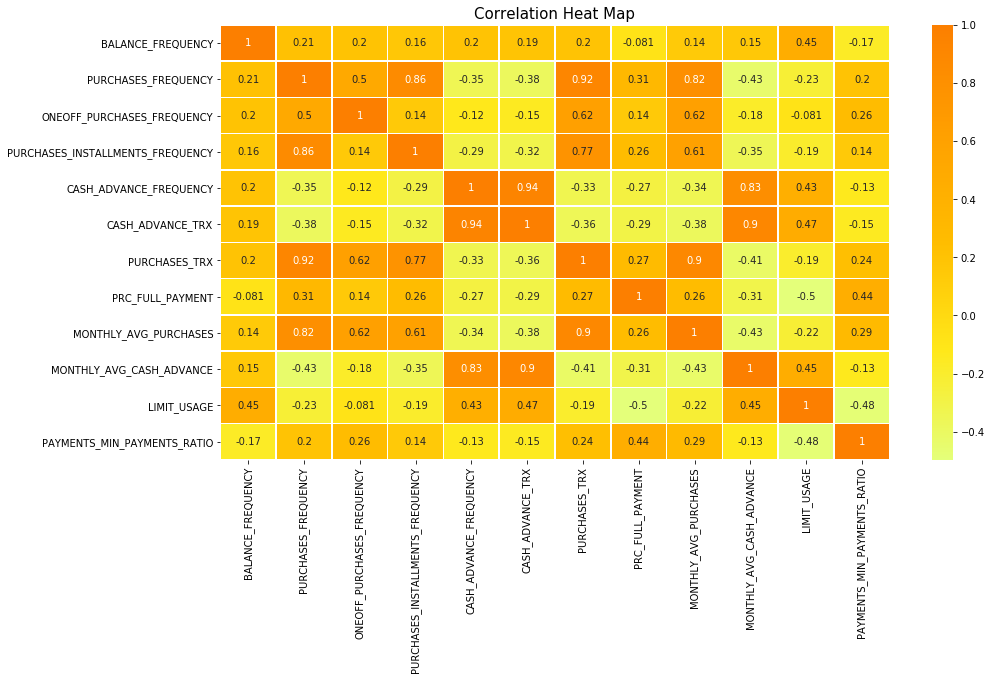

In [68]:
# heatmap using correlation matrix
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(credit_log.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

#### Here we can find that there are many features which are having multicollinearity.

#### We will be using PCA to remove multicollinearity and to reduce the dimensions. Before applying PCA we will standardize data to avoid effect of scale on our result.

In [69]:
# merging of both numerical and categorical variables
credit_encode=pd.concat([credit_log,cr_encode],axis=1)
credit_encode.head()

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0           0.597837             0.154151                    0.000000   
1           0.646627             0.000000                    0.000000   
2           0.693147             0.693147                    0.693147   
3           0.492477             0.080042                    0.080042   
4           0.693147             0.080042                    0.080042   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.080042                0.000000          0.000000   
1                          0.000000                0.223144          1.609438   
2                          0.000000                0.000000          0.000000   
3                          0.000000                0.080042          0.693147   
4                          0.000000                0.000000          0.000000   

   PURCHASES_TRX  PRC_FULL_PAYMENT  MONTHLY_AVG_PURCHASES  \
0       1.098612          0.000000               2.191654   
1       0.000000          0.200671               0.000000   
2       2.564949          0.000000               4.180994   
3       0.693147          0.000000               4.835620   
4       0.693147          0.000000               0.847298   

   MONTHLY_AVG_CASH_ADVANCE  LIMIT_USAGE  PAYMENTS_MIN_PAYMENTS_RATIO  \
0                  0.000000     0.040086                     0.894662   
1                  6.287695     0.376719                     1.574068   
2                  0.000000     0.287197                     0.688979   
3                  2.898616     0.200671                     0.000000   
4                  0.000000     0.519644                     1.327360   

   BOTH ONEOFF & INSTALMENT  INSTALMENT  NONE  ONEOFF  
0                         0           1     0       0  
1                         0           0     1       0  
2                         0           0     0       1  
3                         0           0     0       1  
4                         0           0     0       1

# 7.Feature Scaling (Standardization)

In [70]:
sc=StandardScaler()
credit_scaled=sc.fit_transform(credit_encode)
credit_scaled=pd.DataFrame(credit_scaled,columns=credit_encode.columns)
credit_scaled.head()

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0          -0.148757            -0.746901                   -0.732480   
1           0.179616            -1.302799                   -0.732480   
2           0.492710             1.196820                    2.466762   
3          -0.857867            -1.014151                   -0.363042   
4           0.492710            -1.014151                   -0.363042   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                         -0.674253               -0.727122         -0.810069   
1                         -0.958256                0.707905          0.784603   
2                         -0.958256               -0.727122         -0.810069   
3                         -0.958256               -0.212372         -0.123281   
4                         -0.958256               -0.727122         -0.810069   

   PURCHASES_TRX  PRC_FULL_PAYMENT  MONTHLY_AVG_PURCHASES  \
0      -0.579510         -0.556368              -0.429030   
1      -1.379210          0.391958              -1.523373   
2       0.487865         -0.556368               0.564294   
3      -0.874655         -0.556368               0.891164   
4      -0.874655         -0.556368              -1.100298   

   MONTHLY_AVG_CASH_ADVANCE  LIMIT_USAGE  PAYMENTS_MIN_PAYMENTS_RATIO  \
0                 -0.890667    -1.022796                    -0.497160   
1                  1.697282     0.322182                     0.226846   
2                 -0.890667    -0.035495                    -0.716345   
3                  0.302372    -0.381199                    -1.450553   
4                 -0.890667     0.893219                    -0.036058   

   BOTH ONEOFF & INSTALMENT  INSTALMENT      NONE    ONEOFF  
0                 -0.670193    1.720516 -0.543690 -0.514625  
1                 -0.670193   -0.581221  1.839282 -0.514625  
2                 -0.670193   -0.581221 -0.543690  1.943162  
3                 -0.670193   -0.581221 -0.543690  1.943162  
4                 -0.670193   -0.581221 -0.543690  1.943162

In [71]:
credit_scaled.shape

(8950, 16)

# 8.Dimensionality Reduction (PCA)

In [72]:
#We have 16 features so our n_component will be 16.
pc=PCA(n_components=16)
credit_pca=pc.fit(credit_scaled)

In [73]:
#Lets check if we take 16 components then how much variance it will explain. Ideally it should be 1 i.e 100%
sum(credit_pca.explained_variance_ratio_)

1.0

In [74]:
# Calculating Cumulative Explained Variance Ratio(EVR)
var_ratio={}
for n in range(2,17):
    pc=PCA(n_components=n)
    credit_pca=pc.fit(credit_scaled)
    var_ratio[n]=sum(credit_pca.explained_variance_ratio_)
var_ratio

{2: 0.5521638293657734,
 3: 0.6724015390801595,
 4: 0.7689682782229411,
 5: 0.8395681031207792,
 6: 0.8907289523294153,
 7: 0.9208405870700772,
 8: 0.9420637115918269,
 9: 0.9628895083252489,
 10: 0.9754671820993724,
 11: 0.985499241025479,
 12: 0.9915956162010509,
 13: 0.9947662931023447,
 14: 0.9974558314996169,
 15: 1.0,
 16: 1.0}

Text(0.5, 1.0, 'Cumulative Variance Plot')

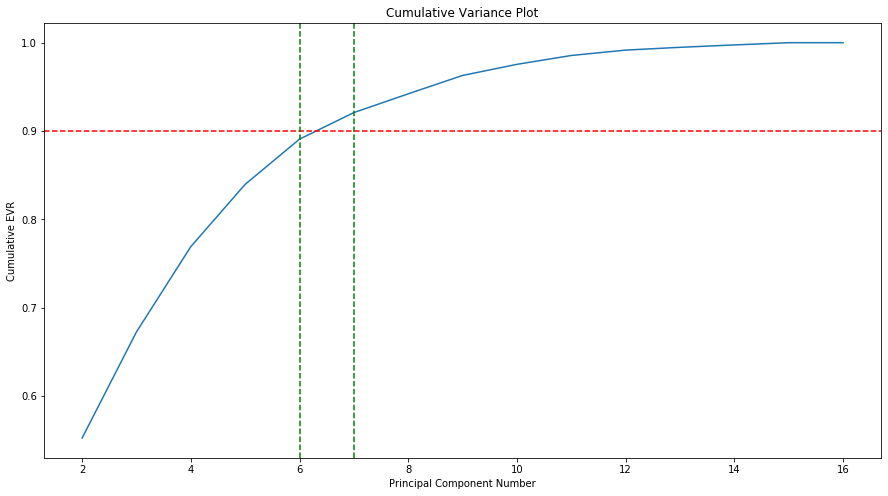

In [75]:
# plotting of Cumulative EVR
pd.Series(var_ratio).plot()
plt.axhline(y=0.9, color="red", linestyle="--")
plt.axvline(x=6,color="green", linestyle="--")
plt.axvline(x=7,color="green", linestyle="--")
plt.xlabel('Principal Component Number')
plt.ylabel('Cumulative EVR')
plt.title('Cumulative Variance Plot')

#### Since 7 components are explaining more than 90% variance so we will select 7 components

In [76]:
pc=PCA(n_components=7)
credit_pca=pc.fit_transform(credit_scaled)

In [77]:
pc.explained_variance_

array([6.07311964, 2.76248885, 1.92401833, 1.54524048, 1.12972342,
       0.81866506, 0.48183999])

# 9.Model Building

In [78]:
credit_model=pd.DataFrame(credit_pca,columns=['PC_'+str(i) for i in range(1,8)])
credit_model.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7
0  0.065509 -2.351500 -0.808282 -0.852112 -0.024910  0.220955  0.235479
1  3.580346 -0.125000 -0.183906  1.429836 -0.430823 -0.743903 -0.081130
2 -1.401315  0.397136  2.493168 -2.132849  0.301884 -0.633239 -0.234572
3  1.078138 -0.858779  1.743438 -1.650217  0.900553  0.865316 -0.821598
4  1.147298 -1.170643  1.655936 -1.946654 -0.242003 -0.845406  0.665289

## 9.1 KMeans Clustering

#### Since we don't know the K value (no. of clusters) for performing KMeans Clustering, we will find the optimal K value from Elbow method and Silhouette Coefficient score

### 9.1.1 Elbow Method

In [79]:
#Calculating Cluster Error in each clusters
cluster_range=range(1,20)
cluster_errors=[]
for num_clusters in cluster_range:
    credit_clusters=KMeans(n_clusters=num_clusters,random_state=1234).fit(credit_model)
    cluster_errors.append(credit_clusters.inertia_)

In [80]:
clusters_description1=pd.DataFrame({"num_cluster":cluster_range,"cluster_errors":cluster_errors})
clusters_description1

num_cluster  cluster_errors
0             1   131864.372068
1             2    90421.352739
2             3    73085.751782
3             4    57156.696746
4             5    49225.539826
5             6    44502.469301
6             7    40766.637009
7             8    37269.831914
8             9    33997.339941
9            10    31641.703788
10           11    29578.597997
11           12    27864.564422
12           13    25720.604124
13           14    24058.934189
14           15    22968.274788
15           16    22320.555681
16           17    21387.026573
17           18    20598.747383
18           19    19987.496663

Text(0, 0.5, 'Cluster Errors')

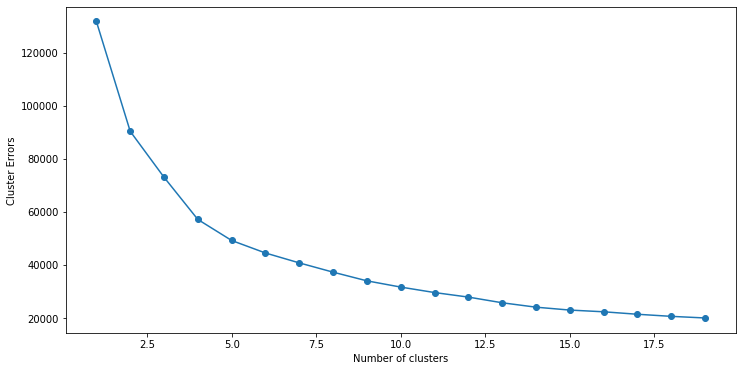

In [81]:
# plotting of cluster errors w.r.t number of clusters
plt.figure(figsize=(12,6))
plt.plot(clusters_description1.num_cluster,clusters_description1.cluster_errors,marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Errors')

### 9.1.2 Silhouette Coefficient

In [82]:
# calculate SC for K=2 through K=12
cluster_range=range(2,20)
scores = []
for num_clusters in cluster_range:
    credit_clusters=KMeans(n_clusters=num_clusters,random_state=1234).fit(credit_model)
    scores.append(metrics.silhouette_score(credit_model, credit_clusters.labels_))

In [83]:
clusters_description2=pd.DataFrame({"num_cluster":cluster_range,"silhouette_coefficient":scores})
clusters_description2

num_cluster  silhouette_coefficient
0             2                0.310619
1             3                0.297075
2             4                0.364722
3             5                0.366638
4             6                0.360394
5             7                0.360454
6             8                0.344503
7             9                0.348693
8            10                0.335075
9            11                0.340818
10           12                0.344766
11           13                0.356575
12           14                0.336094
13           15                0.329161
14           16                0.312502
15           17                0.315860
16           18                0.320939
17           19                0.314982

Text(0, 0.5, 'Silhouette Coefficient')

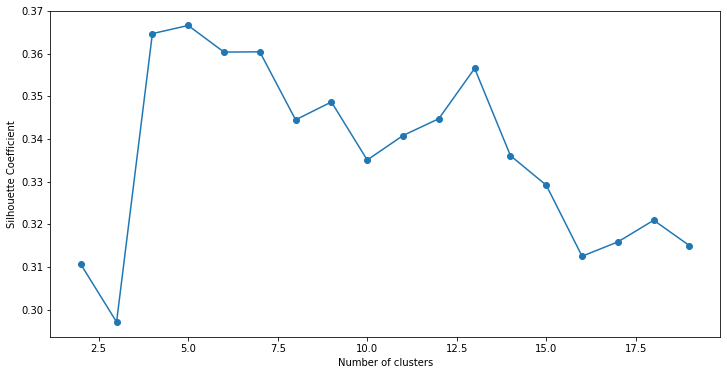

In [84]:
# plotting of silhouette coefficient w.r.t number of clusters
plt.figure(figsize=(12,6))
plt.plot(clusters_description2.num_cluster,clusters_description2.silhouette_coefficient,marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

#### In order to select the optimal value of K with ease, it would be better to plot both cluster errors and silhouette coefficients together w.r.t number of clusters. 
#### We will be using Minmax scaler to make cluster errors and silhouette coefficients of each cluster to same scale.

In [85]:
min_max_cluster_errors=MinMaxScaler()
min_max_silhouette_coefficient=MinMaxScaler()

In [86]:
clusters_description1['cluster_errors_scaling']=min_max_cluster_errors.fit_transform(clusters_description1[['cluster_errors']])
clusters_description2['silhouette_coefficient_scaling']=min_max_silhouette_coefficient.fit_transform(clusters_description2[['silhouette_coefficient']])

<Figure size 1440x864 with 0 Axes>

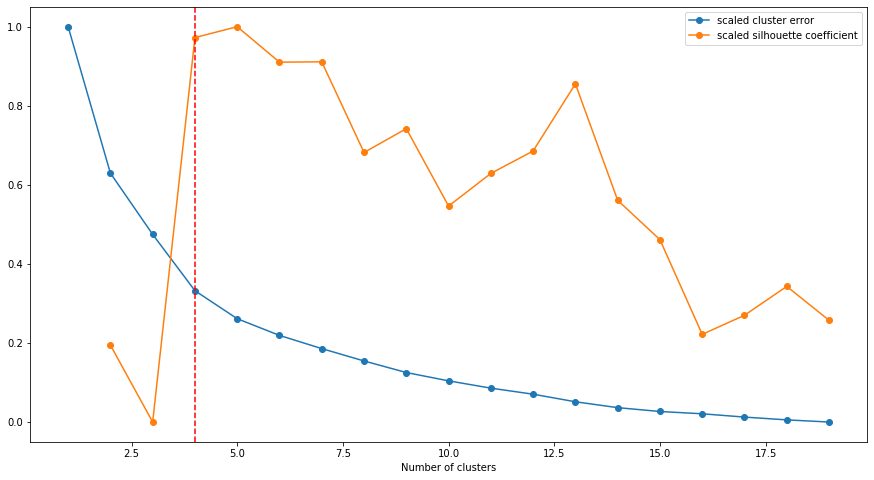

In [87]:
# plotting of both cluster errors and silhouette coefficient w.r.t number of clusters
plt.figure(figsize=(20,12))
fig, ax = plt.subplots()
plt.plot(clusters_description1.num_cluster,clusters_description1.cluster_errors_scaling,marker="o",label='scaled cluster error')
plt.plot(clusters_description2.num_cluster,clusters_description2.silhouette_coefficient_scaling,marker="o",label='scaled silhouette coefficient')
plt.axvline(x=4, color="red", linestyle="--")
plt.xlabel('Number of clusters')
leg = ax.legend();

#### Cluster error line is not decreasing steeply after K=4 in Elbow method and there is a sharp increase in Silhouette coefficient line at K=4
#### Based on Elbow Method and Silhouette Coefficient score we choose K value as 4

In [88]:
# Performing KMeans Clustering at K=4
credit_clusters=KMeans(n_clusters=4,random_state=1234).fit(credit_model)

In [89]:
credit_model['CLUSTER']=pd.DataFrame(credit_clusters.labels_)
credit_model.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0  0.065509 -2.351500 -0.808282 -0.852112 -0.024910  0.220955  0.235479   
1  3.580346 -0.125000 -0.183906  1.429836 -0.430823 -0.743903 -0.081130   
2 -1.401315  0.397136  2.493168 -2.132849  0.301884 -0.633239 -0.234572   
3  1.078138 -0.858779  1.743438 -1.650217  0.900553  0.865316 -0.821598   
4  1.147298 -1.170643  1.655936 -1.946654 -0.242003 -0.845406  0.665289   

   CLUSTER  
0        2  
1        1  
2        3  
3        3  
4        3

In [90]:
credit_original['CLUSTER']=pd.DataFrame(credit_clusters.labels_)
credit_original.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0    40.900749           0.818182             0.166667   
1  3202.467416           0.909091             0.000000   
2  2495.148862           1.000000             1.000000   
3  1666.670542           0.636364             0.083333   
4   817.714335           1.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
3     0.000000        442.874063          0.000000      12   
4   678.334763        244.791237          0.000000      12   

   MONTHLY_AVG_PURCHASES  MONTHLY_AVG_CASH_ADVANCE  LIMIT_USAGE  \
0               7.950000                  0.000000     0.040901   
1               0.000000                536.912124     0.457495   
2              64.430833                  0.000000     0.332687   
3             124.916667                 17.149001     0.222223   
4               1.333333                  0.000000     0.681429   

   PAYMENTS_MIN_PAYMENTS_RATIO  BOTH ONEOFF & INSTALMENT  INSTALMENT  NONE  \
0                     1.446508                         0           1     0   
1                     3.826241                         0           0     1   
2                     0.991682                         0           0     0   
3                     0.000000                         0           0     0   
4                     2.771075                         0           0     0   

   ONEOFF  CLUSTER  
0       0        2  
1       0        1  
2       1        3  
3       1        3  
4       1        3

# 10.Result

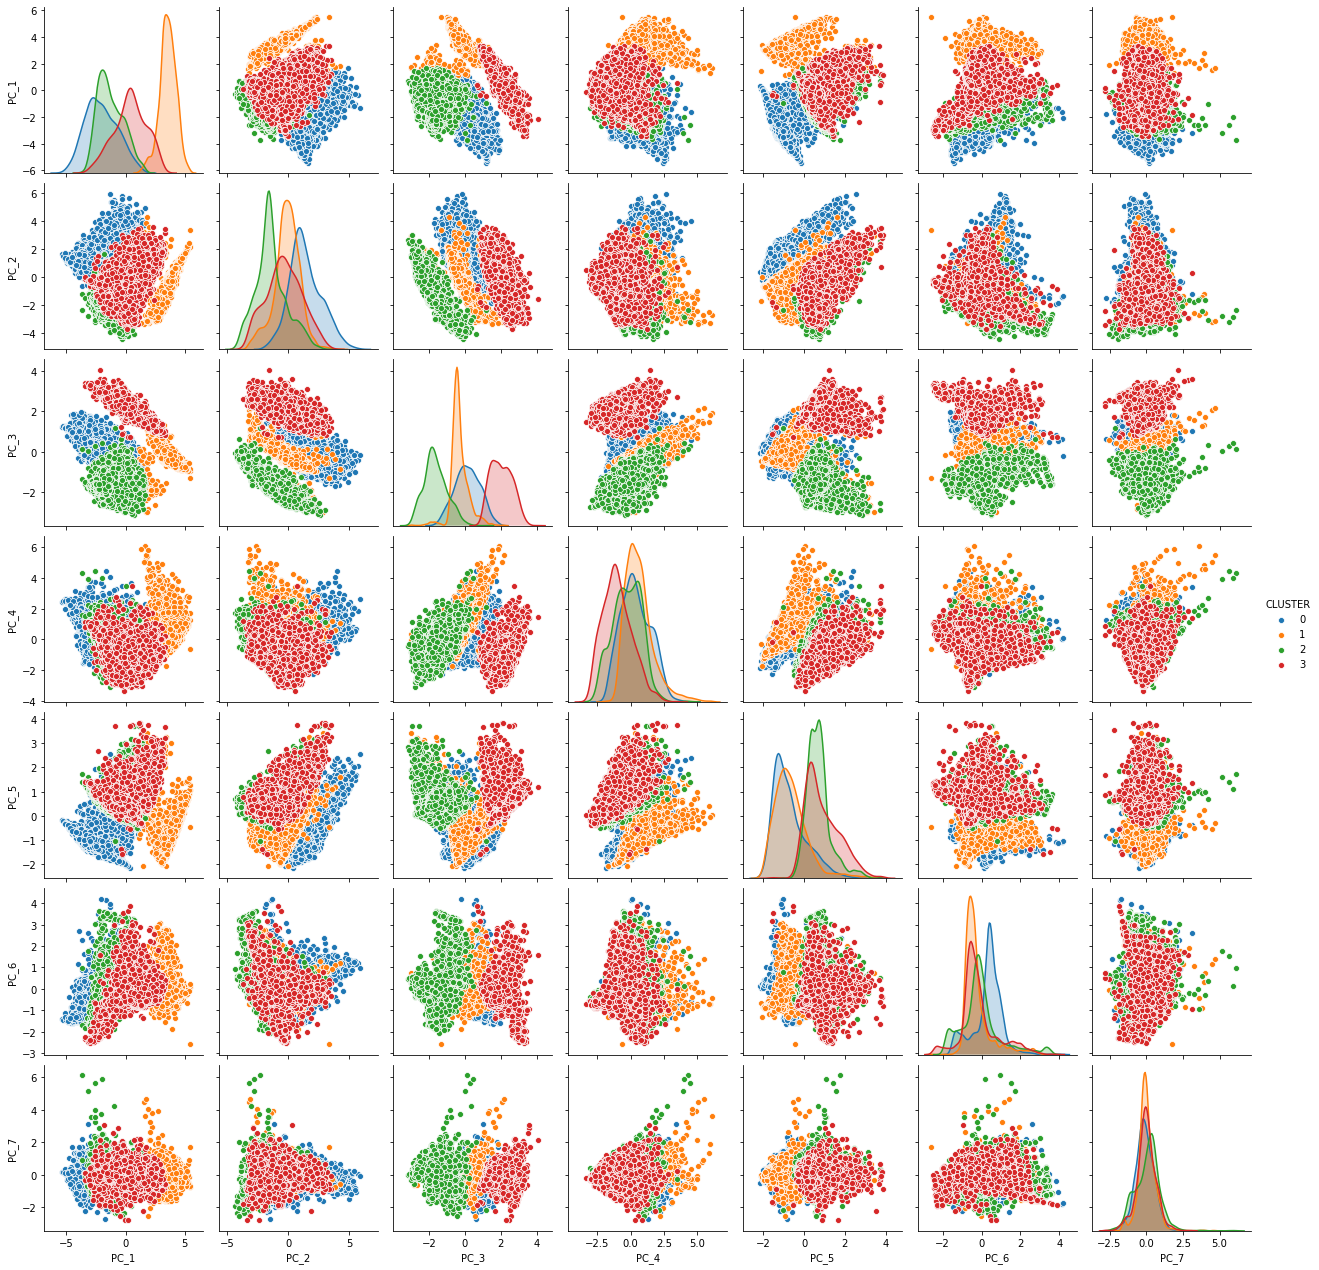

In [91]:
sns.pairplot(credit_model,hue='CLUSTER')

In [92]:
result=credit_original.groupby('CLUSTER').mean().T
result

CLUSTER                                     0            1            2  \
BALANCE                           1797.415291  2218.201535   767.622799   
BALANCE_FREQUENCY                    0.947185     0.886537     0.818325   
PURCHASES_FREQUENCY                  0.804533     0.009121     0.706919   
ONEOFF_PURCHASES_FREQUENCY           0.439519     0.001664     0.000038   
PURCHASES_INSTALLMENTS_FREQUENCY     0.644042     0.006572     0.670590   
CASH_ADVANCE_FREQUENCY               0.103917     0.281653     0.042577   
CASH_ADVANCE_TRX                     2.733261     6.739803     0.908761   
PURCHASES_TRX                       33.228894     0.132677    12.132547   
CREDIT_LIMIT                      5739.644443  4097.124551  3314.676979   
PAYMENTS                          2549.783891  1695.565167   954.720176   
MINIMUM_PAYMENTS                   843.417914  1018.270772   817.355590   
PRC_FULL_PAYMENT                     0.189192     0.043093     0.259681   
TENURE                              11.738719    11.333802    11.463913   
MONTHLY_AVG_PURCHASES              194.248620     0.576532    47.936948   
MONTHLY_AVG_CASH_ADVANCE            65.986337   189.320011    30.857540   
LIMIT_USAGE                          0.352668     0.578690     0.259884   
PAYMENTS_MIN_PAYMENTS_RATIO          7.283627     9.776577    13.564767   
BOTH ONEOFF & INSTALMENT             1.000000     0.009376     0.000454   
INSTALMENT                           0.000000     0.027192     0.999546   
NONE                                 0.000000     0.957337     0.000000   
ONEOFF                               0.000000     0.006095     0.000000   

CLUSTER                                     3  
BALANCE                           1414.927967  
BALANCE_FREQUENCY                    0.833311  
PURCHASES_FREQUENCY                  0.322070  
ONEOFF_PURCHASES_FREQUENCY           0.321847  
PURCHASES_INSTALLMENTS_FREQUENCY     0.000300  
CASH_ADVANCE_FREQUENCY               0.119241  
CASH_ADVANCE_TRX                     2.780279  
PURCHASES_TRX                        7.143087  
CREDIT_LIMIT                      4506.824840  
PAYMENTS                          1492.466395  
MINIMUM_PAYMENTS                   711.638990  
PRC_FULL_PAYMENT                     0.102815  
TENURE                              11.464094  
MONTHLY_AVG_PURCHASES               70.009513  
MONTHLY_AVG_CASH_ADVANCE            76.754424  
LIMIT_USAGE                          0.377550  
PAYMENTS_MIN_PAYMENTS_RATIO          5.544060  
BOTH ONEOFF & INSTALMENT             0.002680  
INSTALMENT                           0.000000  
NONE                                 0.000000  
ONEOFF                               0.997320

Text(0.5, 1.0, '% Distribution of customers in each clusters')

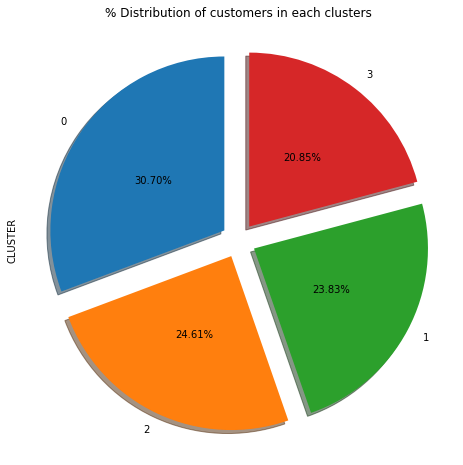

In [93]:
# Pie chart
index=credit_model['CLUSTER'].value_counts().index
credit_model['CLUSTER'].value_counts().plot(kind = 'pie', explode = [0.1, 0.1, 0.1, 0.1], autopct = '%.2f%%', startangle = 90,labels = index, shadow = True, pctdistance = 0.5)
plt.title("% Distribution of customers in each clusters")

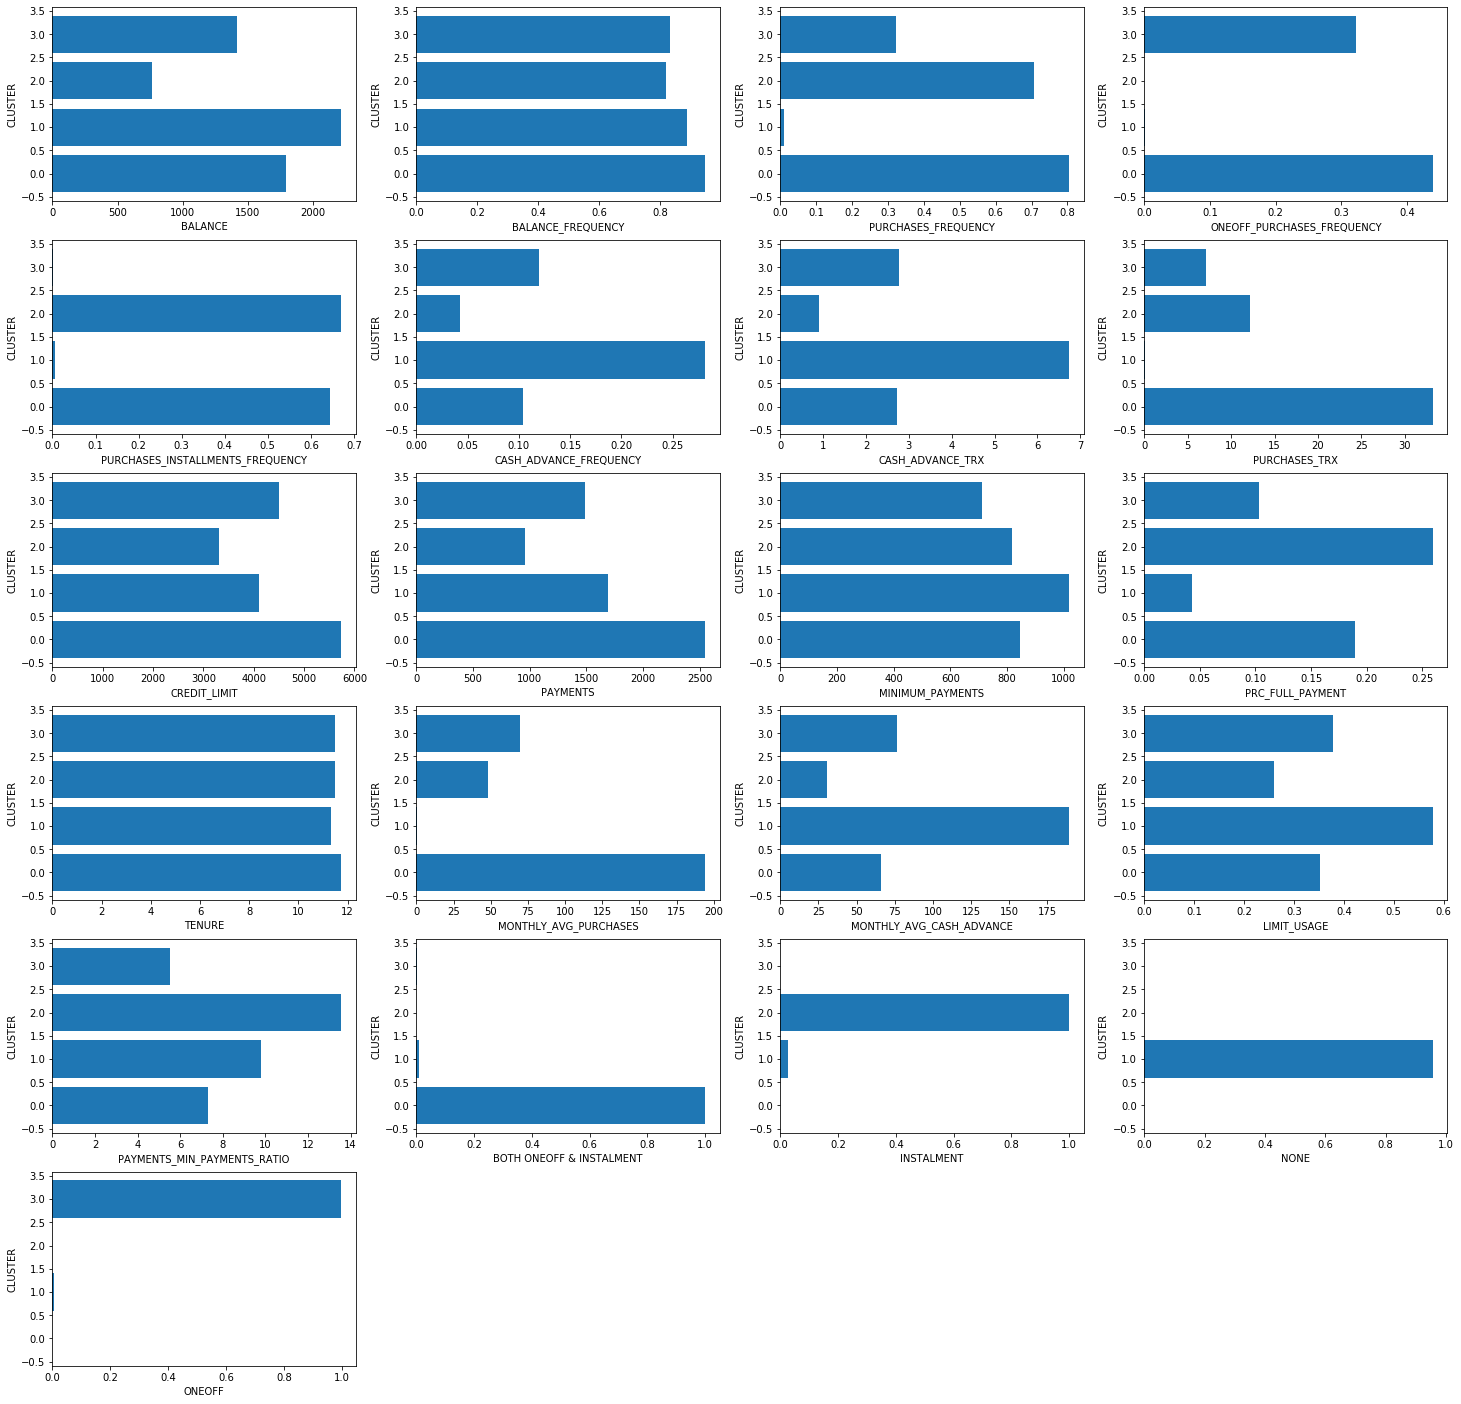

In [94]:
# Bar graph of all columns w.r.t CLUSTERS
x=credit_original.groupby('CLUSTER').apply(lambda x: np.mean(x)).T
plt.figure(figsize=(25,25))
for i in range(len(x.index)-1):
    plt.subplot(6,4,i+1)
    plt.barh(y=range(4), width=x.values[i],align='center')
    plt.ylabel('CLUSTER')
    plt.xlabel(x.index[i])

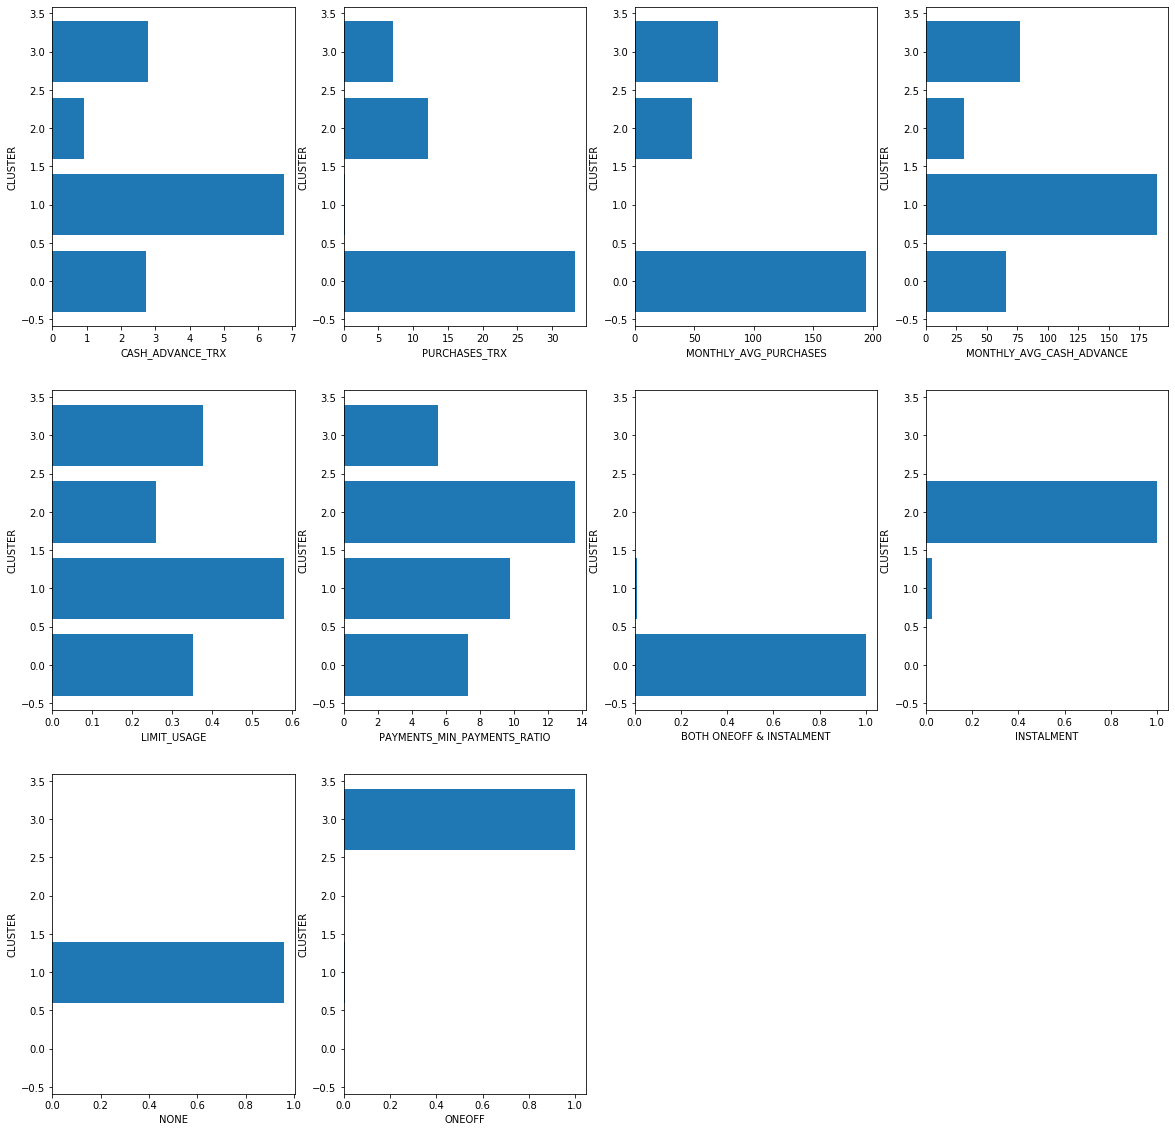

In [95]:
# Bar graph of all KPIs w.r.t CLUSTERS
kpi_var=['CASH_ADVANCE_TRX','PURCHASES_TRX','MONTHLY_AVG_PURCHASES','MONTHLY_AVG_CASH_ADVANCE','LIMIT_USAGE', 'PAYMENTS_MIN_PAYMENTS_RATIO','BOTH ONEOFF & INSTALMENT', 'INSTALMENT', 'NONE', 'ONEOFF']
x=credit_original.groupby('CLUSTER').apply(lambda x: np.mean(x))[kpi_var].T
plt.figure(figsize=(20,20))
for i in range(len(x.index)):
    plt.subplot(3,4,i+1)
    plt.barh(y=range(4), width=x.values[i],align='center')
    plt.ylabel('CLUSTER')
    plt.xlabel(x.index[i])

# 11.Inference

## Cluster 0 :
### Group of customers who :-
- does both instalment as well as one_off purchases.
- have relatively high Balance statement.
- have the highest credit limit.
- have the highest Monthly Average Purchases.
- have relatively low Monthly Average Cash Advance.
- have relatively low Payments to Minimum Payments Ratio.
- This group is about 30.70% of the total customer base.

## Cluster 1 :
### Group of customers who :-
- does no purchase transaction most of the time.
- have the highest Balance statement.
- does the least number of full payments of statement balance.
- have highest Monthly Average Cash Advance.
- have the highest credit card utilisation.
- have relatively better Payments to Minimum Payments Ratio.
- This group is about 23.83% of the total customer base.

## Cluster 2 :
### Group of customers who :-
- does only instalment purchase transaction.
- have the least Balance statement.
- have the least credit limit.
- does the highest number of full payments of statement balance.
- have low Monthly Average Purchases.
- have least Monthly Average Cash Advance.
- have the least credit card utilisation.
- have the highest Payments to Minimum Payments Ratio.
- This group is about 24.61% of the total customer base.

## Cluster 3 :
### Group of customers who :-
- does only one-off purchase transaction.
- have moderate Balance statement.
- have relatively low Monthly Average Purchases.
- have relatively low Monthly Average Cash Advance.
- have the least Payments to Minimum Payments Ratio.
- This group is about 20.85% of the total customer base.